### <img src='fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Introducción al Análisis Estadístico con Lenguajes de Programación para Machine Learning (IAELPML). 2023-2024.
</h1>


<h1 style='font-family: Optima;color:#ecac00'>
Assignment
<a class="tocSkip">    
</h1>  
   

<h1 style='font-family: Optima;color:red'>
Due Date: 2023-11-28
<a class="tocSkip">    
</h1>  


# FINAL COURSE PROJECT

# MADE BY: 

# Manuel Oliveira Pineiro, 202305593@alu.comillas.edu
# Alberto García Martín, 202309188@alu.comillas.edu
# Jorge Peralta Fernández-Revuelta, jperalta@alu.comillas.edu 
# Juan López Segura, juanls@alu.comillas.edu

# CODE

## First Steps

Before starting, we must import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import random
import warnings

In [2]:
warnings.filterwarnings("ignore")

First of all, we load the dataset into a pandas DataFrame named Housing.csv downloaded from *https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction?resource=download*. After that, we take a look at the first 10 rows, shape of the DataFrame and type of columns in order to understand the variables.

In [3]:
houses = pd.read_csv('Data/Housing.csv', sep=",", header=0)

houses.head(n = 10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
print("Shape of the DataFrame = \n", houses.shape)

Shape of the DataFrame = 
 (545, 13)


In [5]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


As we can see, the data file is moderately easy to understand, as well as the information that the columns contain. There are 13 different variables, 545 observations, and no missing values. Nonetheless, we are going to check it.

## Missing Data

The code to eliminate the missing data is really simple, using the code below:

In [6]:
houses = houses.dropna()
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Obviously, there are some examples where we would like to assign values, instead of removing the observations, but for our example none of these is necessary.

## Factor Conversion

The next step is to identify the variables that should be factor due to its values, range, etc. There are some of them (the binaries and the string ones) whose type is designated as object, crearly factors, but maybe some of the *int64* ones go unnoticed.

In [7]:
houses.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


As we can see, the variables `bedrooms`, `bathrooms`, `stories` and `parking` should be treated as a factor, so we proceed in the cell below.

In [8]:
houses = houses.astype({'bedrooms':'category', 'bathrooms':'category', 'stories':'category', 'parking':'category', 
                        'mainroad':'category', 'guestroom':'category', 'basement':'category', 'hotwaterheating':'category', 
                        'airconditioning':'category', 'prefarea':'category', 'furnishingstatus':'category'})

Another option:

In [9]:
# factorCols = houses.select_dtypes(include='object').columns
# factorCols
#houses.loc[:, factorCols] = houses.loc[:, factorCols].astype('category')

In [10]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    category
 3   bathrooms         545 non-null    category
 4   stories           545 non-null    category
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    category
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(11), int64(2)
memory usage: 16.2 KB


Now that we have our data set prepared, we start with the study of each column.

## Detailed Exploratory Analysis

### Variable `price`

As a first approach, we can calculate some statistical measures for our variables. We start with the `price`, that obviously indicates the value of the house.

In [11]:
houses['price'].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

In [12]:
print('The mean of the price variable is: ', houses['price'].mean())
print('\n','-'*70,'\n')
print('The first quartile of the price variable is: ', houses['price'].quantile(0.25))
print('\n','-'*70,'\n')
print('The third quartile of the price variable is: ', houses['price'].quantile(0.75))
print('\n','-'*70,'\n')
print('The median of the price variable is: ', houses['price'].median())
print('\n','-'*70,'\n')
print('The minimum value of the price variable is: ', houses['price'].min())
print('\n','-'*70,'\n')
print('The maximum value of the price variable is: ', houses['price'].max())
print('\n','-'*70,'\n')
print('The standard deviation of the price variable is: ', houses['price'].std(),'\n')

The mean of the price variable is:  4766729.247706422

 ---------------------------------------------------------------------- 

The first quartile of the price variable is:  3430000.0

 ---------------------------------------------------------------------- 

The third quartile of the price variable is:  5740000.0

 ---------------------------------------------------------------------- 

The median of the price variable is:  4340000.0

 ---------------------------------------------------------------------- 

The minimum value of the price variable is:  1750000

 ---------------------------------------------------------------------- 

The maximum value of the price variable is:  13300000

 ---------------------------------------------------------------------- 

The standard deviation of the price variable is:  1870439.615657394 



Now, we can observe a table with absolute frequencies of our variables.

In [13]:
houses['price'].value_counts().sort_index()

price
1750000     3
1767150     1
1820000     1
1855000     1
1890000     2
           ..
10850000    1
11410000    1
12215000    1
12250000    2
13300000    1
Name: count, Length: 219, dtype: int64

Our table suggest that we should handle our variable as a continuous one to obtain good graphical results because most values of this variable appear only once in the table.

So, we will define four classes as follows:
- $price \leq 3500000$: cheap houses.
- $3500000 < price \leq 7000000$: medium-price houses.
- $7000000 < price \leq 10000000$: expensive houses.
- $10000000 < price $: overpriced houses.

Next step is to build our intervals (classes) and check which interval corresponds to each observation.

In [14]:
bins = [1329000, 3500000, 7000000, 10000000, 13300000]
pd.cut(houses['price'], bins = bins,ordered=True)

0      (10000000, 13300000]
1      (10000000, 13300000]
2      (10000000, 13300000]
3      (10000000, 13300000]
4      (10000000, 13300000]
               ...         
540      (1329000, 3500000]
541      (1329000, 3500000]
542      (1329000, 3500000]
543      (1329000, 3500000]
544      (1329000, 3500000]
Name: price, Length: 545, dtype: category
Categories (4, interval[int64, right]): [(1329000, 3500000] < (3500000, 7000000] < (7000000, 10000000] < (10000000, 13300000]]

We add a column to our dataframe with the interval for each record.

In [15]:
houses['price_binned'] = pd.cut(houses['price'], bins = bins)
houses['price_binned'].value_counts().sort_index()

price_binned
(1329000, 3500000]      158
(3500000, 7000000]      323
(7000000, 10000000]      56
(10000000, 13300000]      8
Name: count, dtype: int64

Let's check it.

In [16]:
houses.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_binned
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,"(10000000, 13300000]"
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,"(10000000, 13300000]"
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,"(10000000, 13300000]"
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,"(10000000, 13300000]"
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,"(10000000, 13300000]"


We plot now our binned variable with an histogram.

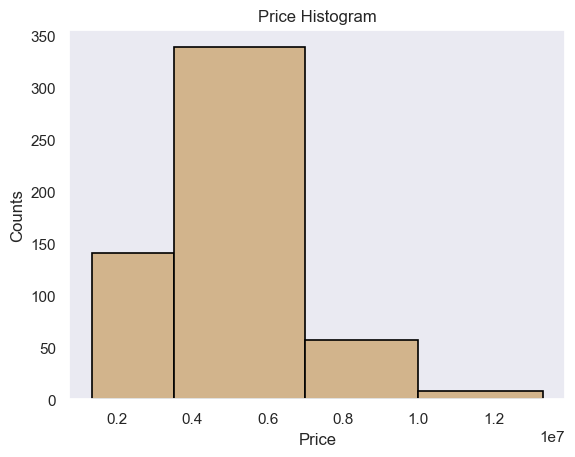

In [17]:
sns.set()
plot = houses.hist('price', edgecolor = 'black', linewidth = 1.2, 
                   grid = False, color = 'tan', bins = bins) 

plt.xlabel('Price')
plt.ylabel('Counts')
plt.title('Price Histogram')
plt.show()

As we could expect, medium-priced houses are the most common class, while overpriced houses are less often seen.

We can represent our not-binned variable with an histogram, as well as a density plot.

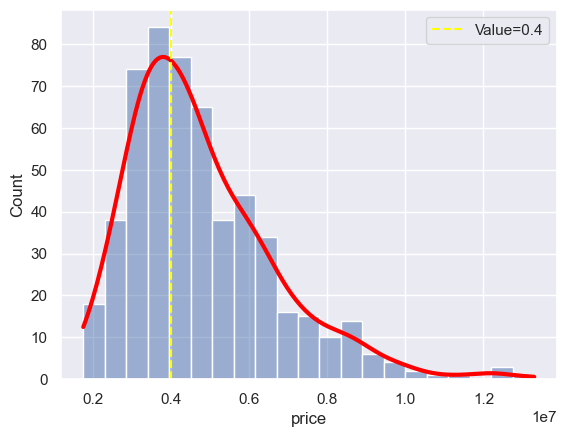

In [18]:
dens_plot = sns.histplot(data = houses, x = 'price', kde = True)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)
plt.axvline(x = 0.4*1e7, color = 'yellow', linestyle = '--', label = f'Value={0.4}')
plt.legend()

We can see in the plot how we have a unimodal distribution that is slightly right sweked. The mode is centered at a slightly lower number than 0.4 (in terms of 1e7). Additionally, the density curve resembles slightly a Gaussian bell curve, so we will check if we can assume that its distribution is normal.

We will check it with a QQplot. If our variable is normally-distributed, the points should fall on a line.

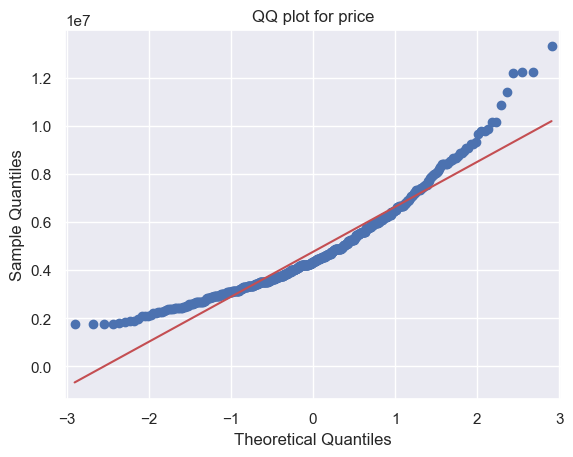

In [19]:
sm.qqplot(houses['price'], line='s')
plt.title('QQ plot for price')
plt.show()

So, we cannot assume that our variable is normally-distributed, since there are a large proportion of the points not falling in the line.

Finally, we represent our variable with a mix of two graphics: a violinplot and a boxplot.

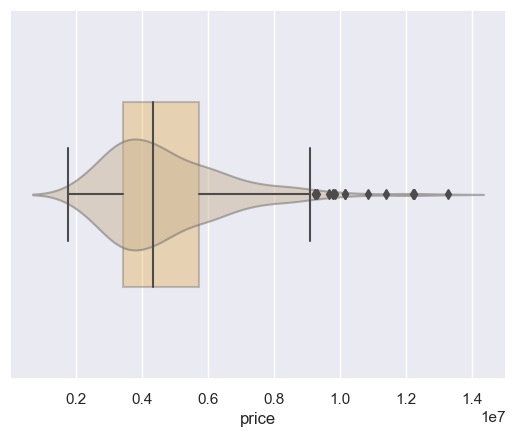

In [20]:
ax = sns.boxplot(x = 'price', data = houses, width = 0.5, color = 'orange', boxprops = dict(alpha = 0.3))
ax = sns.violinplot(x = 'price', data = houses, width = 0.3, alpha = 0.3, color = 'tan', inner = None)

for violin, alpha in zip(ax.collections[::2], [0.5]):
    violin.set_alpha(alpha)

We have some outliers at the top of the plot, but not at the bottom, so we will locate them:

In [21]:
price_iqr = stats.iqr(houses['price'])
price_q1, price_q3 = np.quantile(houses['price'], [0.25, 0.75])

cut_low = price_q1 - 1.5 * price_iqr
cut_high = price_q3 + 1.5 * price_iqr

print("Lower and upper outlier limits:", cut_low, ", ", cut_high)

price_outliers = houses.loc[(houses['price'] > cut_high)]

print("The outliers are")

price_outliers

Lower and upper outlier limits: -35000.0 ,  9205000.0
The outliers are


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_binned
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,"(10000000, 13300000]"
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,"(10000000, 13300000]"
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,"(10000000, 13300000]"
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,"(10000000, 13300000]"
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,"(10000000, 13300000]"
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished,"(10000000, 13300000]"
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,"(10000000, 13300000]"
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,"(10000000, 13300000]"
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,"(7000000, 10000000]"
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,"(7000000, 10000000]"


In [22]:
print('So, we have', price_outliers.shape[0], 'outliers:',
    price_outliers[price_outliers['price'] > 10000000].shape[0],
     'are from overpriced houses class and', 
      price_outliers[price_outliers['price'] <= 10000000].shape[0],
     'are from expensive houses class.')

So, we have 15 outliers: 8 are from overpriced houses class and 7 are from expensive houses class.


In [23]:
houses.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_binned
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,"(10000000, 13300000]"
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,"(10000000, 13300000]"
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,"(10000000, 13300000]"
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,"(10000000, 13300000]"
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,"(10000000, 13300000]"


### Variable `area`

Now we continue with the second quantitative: the total area of the house in square feet.

In [24]:
houses['area'].describe()

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64

In [25]:
print('The mean of the area variable is: ', houses['area'].mean())
print('\n','-'*70,'\n')
print('The first quartile of the area variable is: ', houses['area'].quantile(0.25))
print('\n','-'*70,'\n')
print('The third quartile of the area variable is: ', houses['area'].quantile(0.75))
print('\n','-'*70,'\n')
print('The median of the area variable is: ', houses['area'].median())
print('\n','-'*70,'\n')
print('The minimum value of the area variable is: ', houses['area'].min())
print('\n','-'*70,'\n')
print('The maximum value of the area variable is: ', houses['area'].max())
print('\n','-'*70,'\n')
print('The standard deviation of the area variable is: ', houses['area'].std(),'\n')

The mean of the area variable is:  5150.54128440367

 ---------------------------------------------------------------------- 

The first quartile of the area variable is:  3600.0

 ---------------------------------------------------------------------- 

The third quartile of the area variable is:  6360.0

 ---------------------------------------------------------------------- 

The median of the area variable is:  4600.0

 ---------------------------------------------------------------------- 

The minimum value of the area variable is:  1650

 ---------------------------------------------------------------------- 

The maximum value of the area variable is:  16200

 ---------------------------------------------------------------------- 

The standard deviation of the area variable is:  2170.141022508803 



Now, we can observe a table with absolute frequencies of our variables.

In [26]:
houses['price'].value_counts().sort_index()

price
1750000     3
1767150     1
1820000     1
1855000     1
1890000     2
           ..
10850000    1
11410000    1
12215000    1
12250000    2
13300000    1
Name: count, Length: 219, dtype: int64

In this particular case, it is possible to categorize the variable into three distinct classes, small, medium, and large houses. However, we have reservations about the utility of this categorization for the analysis. If we would have proceed with this categorization, it would be the same process of classifying the variable "price".

We can represent our variable with an histogram, as well as a density plot.

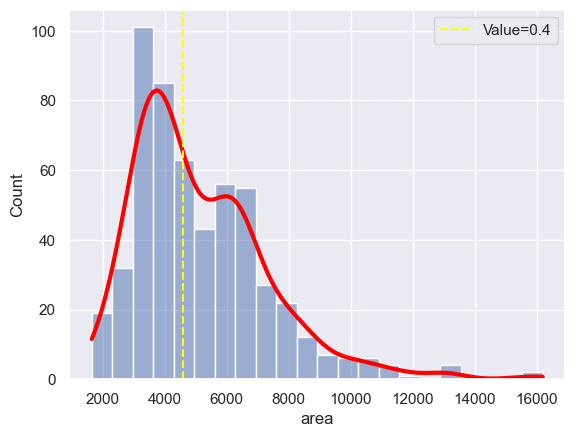

In [27]:
dens_plot = sns.histplot(data = houses, x = "area", kde = True)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)
plt.axvline(x = 0.46*1e4, color = 'yellow', linestyle = '--', label = f'Value={0.4}')
plt.legend()

We can see in the plot how we have a distribution that is slightly right sweked, and similar to a multimodal. The mode is centered at a slightly greater number than 4000 square feet. Additionally, we will check if we can assume that its distribution is normal.

We will check it with a QQplot. If our variable is normally-distributed, the points should fall on a line.

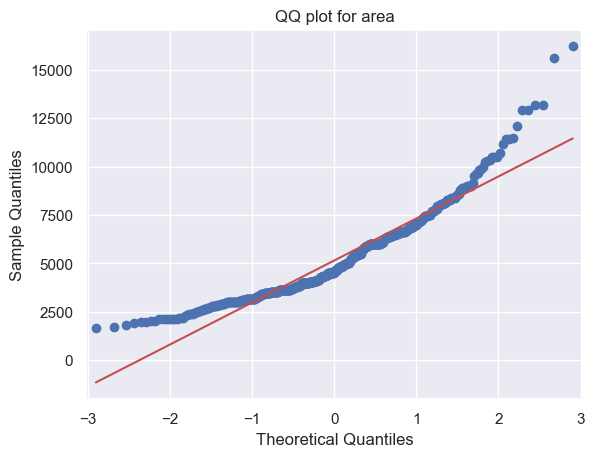

In [28]:
sm.qqplot(houses['area'], line='s')
plt.title('QQ plot for area')
plt.show()

Like the variable 'price', we cannot assume that our variable is normally-distributed, since there are a large proportion of the points not falling in the line.

Finally, we represent our variable with a mix of two graphics: a violinplot and a boxplot.

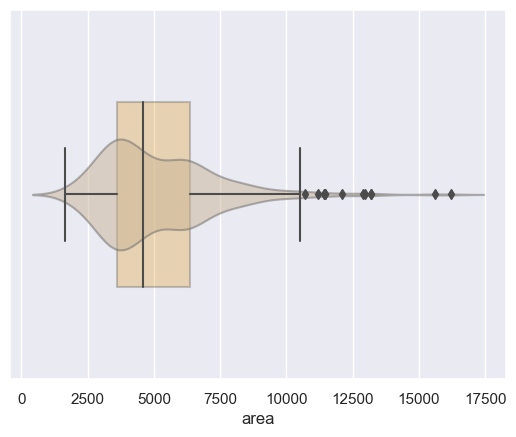

In [29]:
ax = sns.boxplot(x = 'area', data = houses, width = 0.5, color = 'orange', boxprops = dict(alpha = 0.3))
ax = sns.violinplot(x = 'area', data = houses, width = 0.3, alpha = 0.3, color = 'tan', inner = None)

for violin, alpha in zip(ax.collections[::2], [0.5]):
    violin.set_alpha(alpha)

We have some outliers at the top of the plot, but not at the bottom, so we will locate them:

In [30]:
area_iqr = stats.iqr(houses['area'])
area_q1, area_q3 = np.quantile(houses['area'], [0.25, 0.75])

cut_low = area_q1 - 1.5 * area_iqr
cut_high = area_q3 + 1.5 * area_iqr

print("Lower and upper outlier limits:", cut_low, ", ", cut_high)

area_outliers = houses.loc[(houses['area'] > cut_high)]
print('We have', area_outliers.shape[0], 'outliers.')
print("The outliers are")
area_outliers


Lower and upper outlier limits: -540.0 ,  10500.0
We have 12 outliers.
The outliers are


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_binned
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,"(10000000, 13300000]"
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished,"(7000000, 10000000]"
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished,"(7000000, 10000000]"
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished,"(3500000, 7000000]"
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished,"(3500000, 7000000]"
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished,"(3500000, 7000000]"
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished,"(3500000, 7000000]"
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished,"(3500000, 7000000]"
186,5110000,11410,2,1,2,yes,no,no,no,no,0,yes,furnished,"(3500000, 7000000]"
191,5040000,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished,"(3500000, 7000000]"


#### Relationship between `price` and `area`

The next and last segment of the study of a variable focuses on its relationship with the dependant variable price. 

For this specific subsection, due to the continuous nature of the column, we plot a scatter plot, along with Pearson's correlation coefficient in order to estimate the degree of dependence.

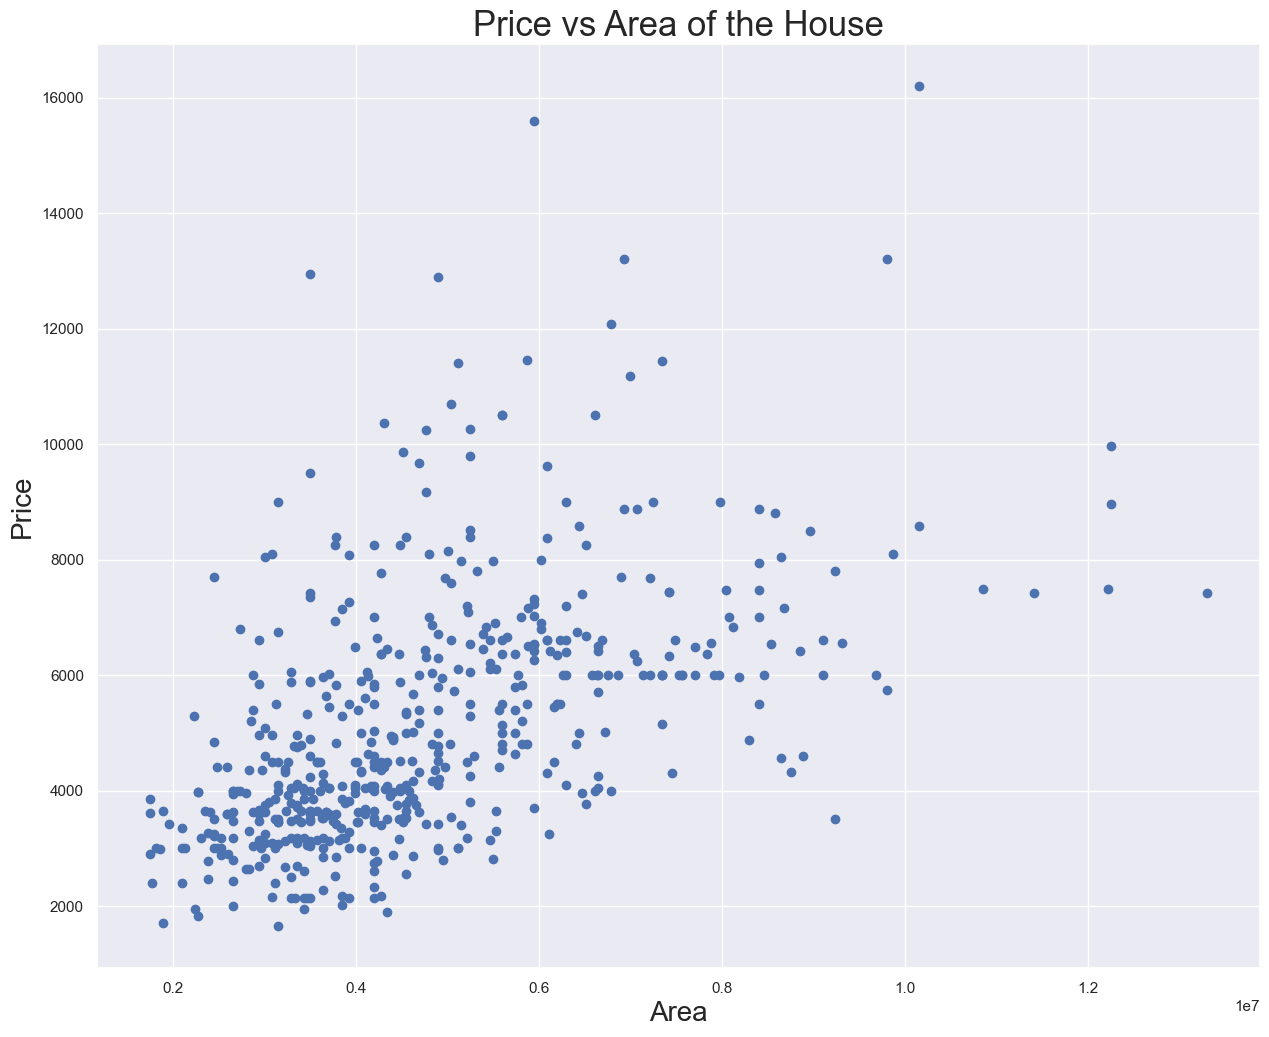

In [31]:
sns.set(rc={'figure.figsize':(15, 12)})
plt.plot('price', 'area', 'bo', data=houses)
plt.xlabel('Area', fontdict={'fontsize':20})   
plt.ylabel('Price', fontdict={'fontsize':20})
plt.title('Price vs Area of the House', fontdict={'fontsize':25})
plt.show()

In [32]:
correlation_coefficient = np.corrcoef(houses['price'], houses['area'])[0,1]

print("Pearson's correlation coefficient:", correlation_coefficient)

Pearson's correlation coefficient: 0.5359973457780797


It is easily determined that, even though the correlation coefficient is greater than 0.5, they don't have a strong relation. Obviously, this variable has some valuable information to predict the price of a house, but clearly it shouldn't be the only one to be used. Nonetheless, we can see that a model using only this column performs pretty well, so it has to be used in the future models.

In [33]:
model=sm.OLS(houses["price"],houses["area"]).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              3717.
Date:                Sat, 28 Oct 2023   Prob (F-statistic):                   2.64e-245
Time:                        15:41:40   Log-Likelihood:                         -8632.0
No. Observations:                 545   AIC:                                  1.727e+04
Df Residuals:                     544   BIC:                                  1.727e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Variable `bedrooms`

We continue with this column, the number of bedrooms in the house. We start creating the tables of absolute and relative frequencies for our variable.

In [34]:
print(houses['bedrooms'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
AbsFreq_1 = houses['bedrooms'].value_counts().sort_index()
print(AbsFreq_1)
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['bedrooms'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      6
top         3
freq      300
Name: bedrooms, dtype: int64
------------------------------ 

Absolute Frequency: 

bedrooms
1      2
2    136
3    300
4     95
5     10
6      2
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

bedrooms
1    0.003670
2    0.249541
3    0.550459
4    0.174312
5    0.018349
6    0.003670
Name: proportion, dtype: float64
------------------------------ 



Now, we compute some statistical measures.

In [35]:
mean_1 = (AbsFreq_1.index.astype(int)*AbsFreq_1).sum()/AbsFreq_1.values.sum()
print('The mean of the bedrooms variable is: ', mean_1)
print('\n','-'*70,'\n')
print('The mode of the bedrooms variable is: ', houses['bedrooms'].mode().values[0])
print('\n','-'*70,'\n')
print('The first quartile of the bedrooms variable is: ', houses['bedrooms'].sort_values().values[len(houses) // 4])
print('\n','-'*70,'\n')
print('The third quartile of the bedrooms variable is: ', houses['bedrooms'].sort_values().values[3*len(houses) // 4])
print('\n','-'*70,'\n')
median_1 = houses['bedrooms'].sort_values().values[len(houses) // 2]
print('The median of the bedrooms variable is: ', median_1)
print('\n','-'*70,'\n')
print('The minimum value of the bedrooms variable is: ', houses['bedrooms'].sort_values().values[0])
print('\n','-'*70,'\n')
print('The maximum value of the bedrooms variable is: ', houses['bedrooms'].sort_values().values[-1])
print('\n','-'*70,'\n')
print('The standard deviation of the bedrooms variable is: ', np.sqrt(((AbsFreq_1.index.astype(int) - mean_1) ** 2 * AbsFreq_1).sum() / AbsFreq_1.sum()),'\n')

The mean of the bedrooms variable is:  2.9651376146788992

 ---------------------------------------------------------------------- 

The mode of the bedrooms variable is:  3

 ---------------------------------------------------------------------- 

The first quartile of the bedrooms variable is:  2

 ---------------------------------------------------------------------- 

The third quartile of the bedrooms variable is:  3

 ---------------------------------------------------------------------- 

The median of the bedrooms variable is:  3

 ---------------------------------------------------------------------- 

The minimum value of the bedrooms variable is:  1

 ---------------------------------------------------------------------- 

The maximum value of the bedrooms variable is:  6

 ---------------------------------------------------------------------- 

The standard deviation of the bedrooms variable is:  0.7373864268686331 



Finally, we represent a barplot showing the relative frequencies, in order to represent the probabilities of the different number of bedrooms.


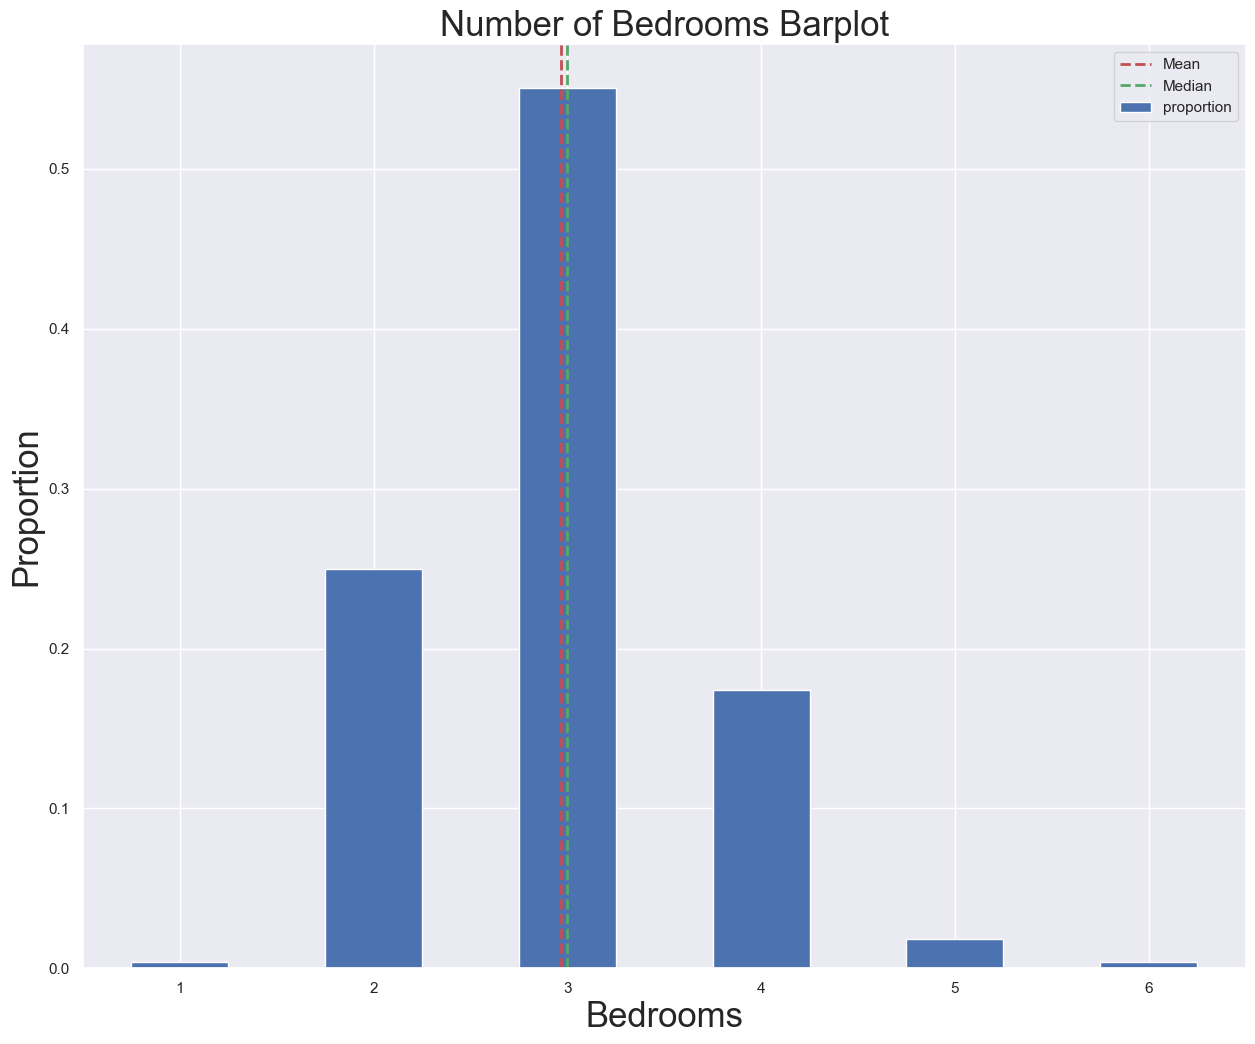

In [36]:
RelFreq_1 = houses['bedrooms'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_1.plot.bar(rot=0)
plt.xlabel("Bedrooms", fontdict={'fontsize': 25})
plt.ylabel("Proportion", fontdict={'fontsize': 25})
#plot = RelFreq_1.plot.bar(rot=0, xlabel='Bedrooms', ylabel ='Proportion')
plt.title('Number of Bedrooms Barplot', fontdict={'fontsize': 25})

#Minus 1 because it starts on 1
plt.axvline(x=mean_1-1, color='r', linestyle='--', linewidth=2, label='Mean')
plt.axvline(x=median_1-1, color='g', linestyle='--', linewidth=2, label='Median')
plt.legend()
plt.show()

We can say that the most common number of bedrooms is 3, since the less often seen number of bedrooms is 1 and 6, which makes sense. Notice that 3 is the median and almost the mean of our variable, so we could expect this result. In the other hand, 1 and 6 bedrooms are the extreme values, so it could be expected too. 

#### Relationship between `bedrooms` and `price`

It will be interesting to study how the bedrooms variable is relationed with our dependent variable. In order to do that we show a violinplot of the price of a house conditioned to a certain amount of bedrooms. Nevertheless, we need to change the methods and plots, due to the fact that now, one of the variables has a different type: it's a factor. There are several ways to study the relation between both of them, but we are to observe the strip plots, boxplots, density curves and, as a mix of both, the violin plot. Obviously, after this example, in the rest of columns there will not be used all of the graphics, only the ones that could sum up all the relevant information.

Prior to that, we should slightly modify the variable bedrooms, as there are two categories with no more than 2 observations(1,6), so we will merge the category that corresponds to 1 bedroom with the one of 2 bedrooms, and we will do the same with the categories 4,5 and 6.

In [37]:
houses['bedrooms'].replace({1: '<=2', 2: '<=2'}, inplace=True)
houses['bedrooms'].replace({5: '>=5', 6: '>=5'}, inplace=True)

ordered_categories = ['<=2', 3, 4, '>=5']

# Category ordering
houses['bedrooms'].value_counts().sort_index()


bedrooms
<=2    138
3      300
4       95
>=5     12
Name: count, dtype: int64

 It is important to consider that there only are 12 houses in the dataset with more than 5 bedrooms.
 Let's check the relation we mentioned earlier by plotting some graphics.

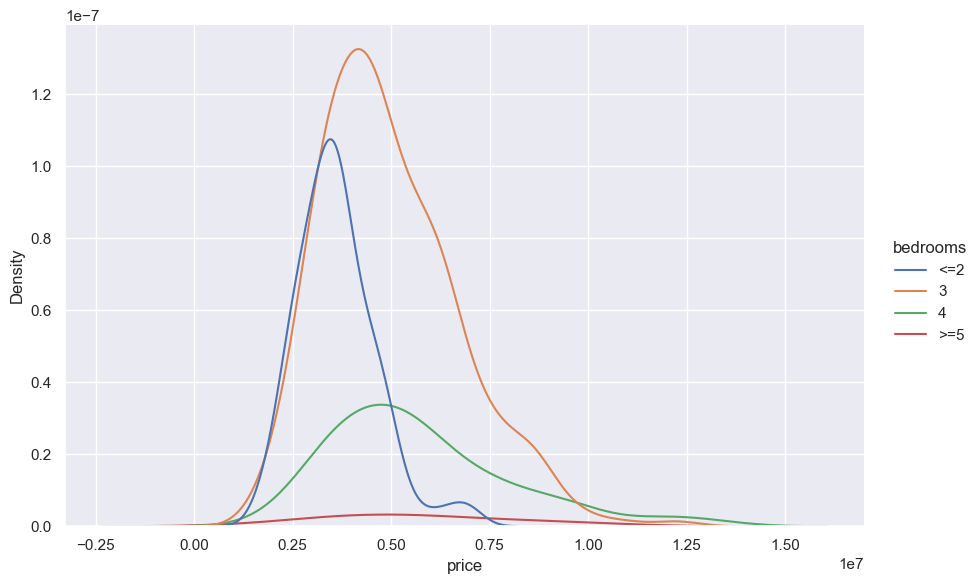

In [38]:
# Density curves
sns.set(rc={'figure.figsize':(18, 12)}) 
sns.displot(data=houses, x="price", hue="bedrooms", kind="kde",  height=6, aspect=1.5)
plt.show()

Text(0.5, 1.0, 'Strip Plot of Price~Bedrooms')

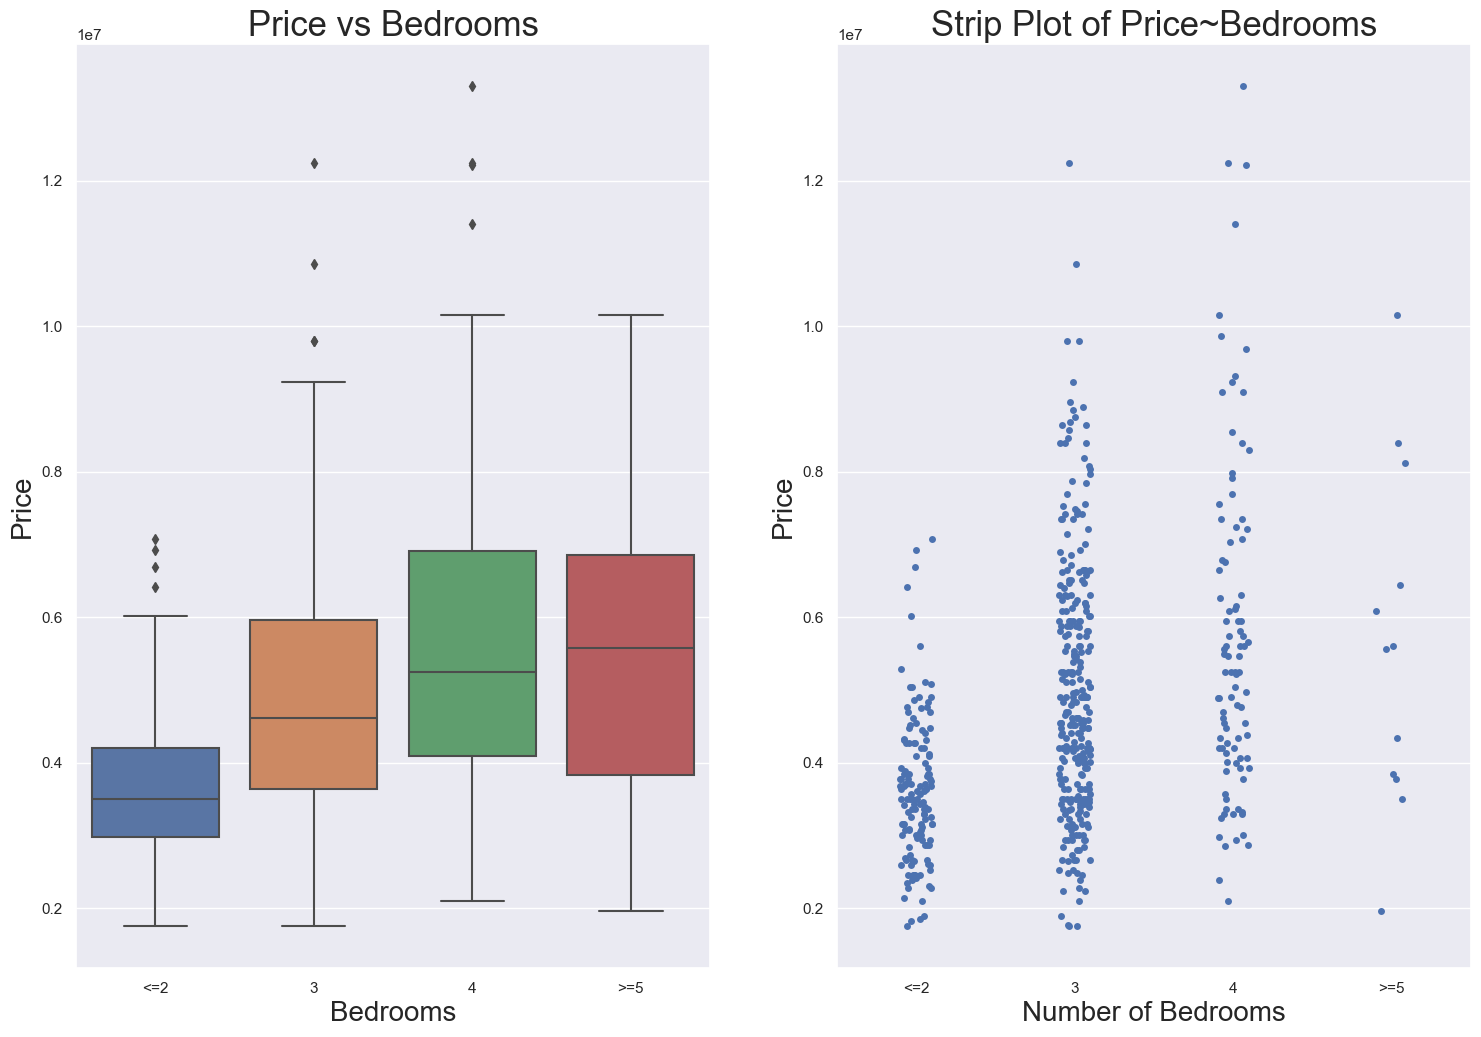

In [39]:
# Boxplot 
plt.subplot(1, 2, 1)
sns.boxplot(x='bedrooms', y='price', data=houses)
plt.xlabel('Bedrooms', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Price vs Bedrooms', fontdict={'fontsize': 25})

# Strip plot
plt.subplot(1, 2, 2)
sns.stripplot(x='bedrooms', y='price', data=houses)
plt.xlabel('Number of Bedrooms', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Strip Plot of Price~Bedrooms', fontdict={'fontsize': 25})

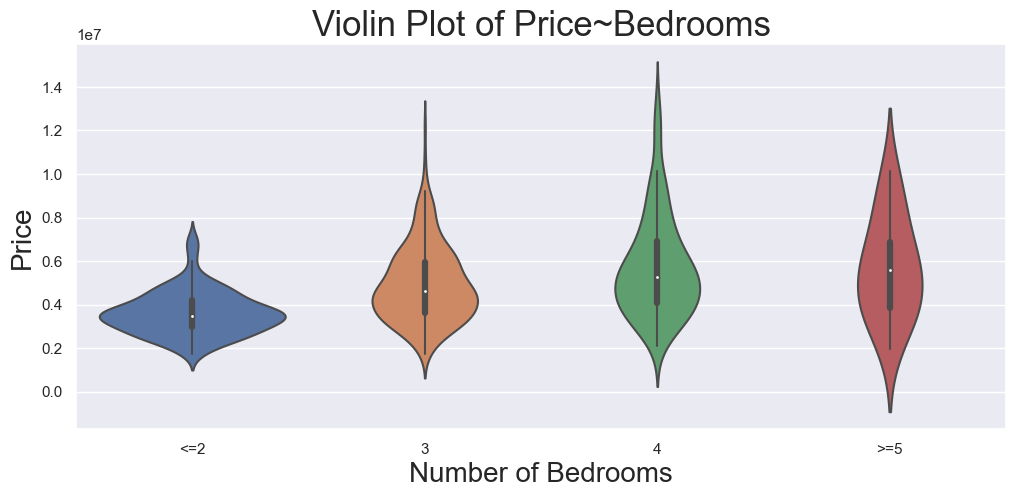

In [40]:
plt.figure(figsize=(12, 5))
sns.violinplot(x='bedrooms', y='price', data=houses)
plt.xlabel('Number of Bedrooms', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Violin Plot of Price~Bedrooms', fontdict={'fontsize': 25})

# Plot display
plt.show()

By checking the 3 first categories of the graphics, we can identify an increasing tendency on the price as the number of bedrooms grows, however, it is not possible to spot this in the las category.
This is probably explained by the low amount of houses with more than 5 bedrooms that we have in our data.
It is also interesting to see how not only the price but also the variance grows as the number of bedrooms increases. It means that the price of a house with less than 2 bedrooms will be considerably easier to predict than one with 4 or more bedrooms, due to how dispersed the points in these categories are.

 

In [41]:
houses.groupby('bedrooms')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
<=2,138.0,3.618696e+06,1.004145e+06,1750000.0,2971500.0,3500000.0,4200000.0,7070000.0
3,300.0,4.954598e+06,1.747527e+06,1750000.0,3640000.0,4620000.0,5967500.0,12250000.0
4,95.0,5.729758e+06,2.307740e+06,2100000.0,4095000.0,5250000.0,6912500.0,13300000.0
>=5,12.0,5.648417e+06,2.363597e+06,1960000.0,3830750.0,5582500.0,6860000.0,10150000.0


This table shows exactly what we mentioned earlier as in it we can see how mean,median, standard deviation, etc. all grow as the number of bedrooms increases.



### Variable `bathrooms`

The next variable to study is `bathrooms`, that indicates the number of bathrooms in the house.

We create now the tables of absolute and relative frequencies for our variable.

In [42]:
print(houses['bathrooms'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
AbsFreq_2 = houses['bathrooms'].value_counts().sort_index()
print(AbsFreq_2)
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['bathrooms'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      4
top         1
freq      401
Name: bathrooms, dtype: int64
------------------------------ 

Absolute Frequency: 

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

bathrooms
1    0.735780
2    0.244037
3    0.018349
4    0.001835
Name: proportion, dtype: float64
------------------------------ 



In [43]:
mean_2 = (AbsFreq_2.index.astype(int)*AbsFreq_2).sum()/AbsFreq_2.values.sum()
print('The mean of the bathrooms variable is: ', mean_2)
print('\n','-'*70,'\n')
print('The mode of the bathrooms variable is: ', houses['bathrooms'].mode().values[0])
print('\n','-'*70,'\n')
print('The first quartile of the bathrooms variable is: ', houses['bathrooms'].sort_values().values[len(houses) // 4])
print('\n','-'*70,'\n')
print('The third quartile of the bathrooms variable is: ', houses['bathrooms'].sort_values().values[3*len(houses) // 4])
print('\n','-'*70,'\n')
median_2 = houses['bathrooms'].sort_values().values[len(houses) // 2]
print('The median of the bathrooms variable is: ', median_2)
print('\n','-'*70,'\n')
print('The minimum value of the bathrooms variable is: ', houses['bathrooms'].sort_values().values[0])
print('\n','-'*70,'\n')
print('The maximum value of the bathrooms variable is: ', houses['bathrooms'].sort_values().values[-1])
print('\n','-'*70,'\n')
print('The standard deviation of the bathrooms variable is: ', np.sqrt(((AbsFreq_2.index.astype(int) - mean_2) ** 2 * AbsFreq_2).sum() / AbsFreq_2.sum()),'\n')

The mean of the bathrooms variable is:  1.2862385321100918

 ---------------------------------------------------------------------- 

The mode of the bathrooms variable is:  1

 ---------------------------------------------------------------------- 

The first quartile of the bathrooms variable is:  1

 ---------------------------------------------------------------------- 

The third quartile of the bathrooms variable is:  2

 ---------------------------------------------------------------------- 

The median of the bathrooms variable is:  1

 ---------------------------------------------------------------------- 

The minimum value of the bathrooms variable is:  1

 ---------------------------------------------------------------------- 

The maximum value of the bathrooms variable is:  4

 ---------------------------------------------------------------------- 

The standard deviation of the bathrooms variable is:  0.5020084231005495 



Finally, we represent a barplot showing the relative frequencies, in order to represent the probabilities of the different number of bathrooms.

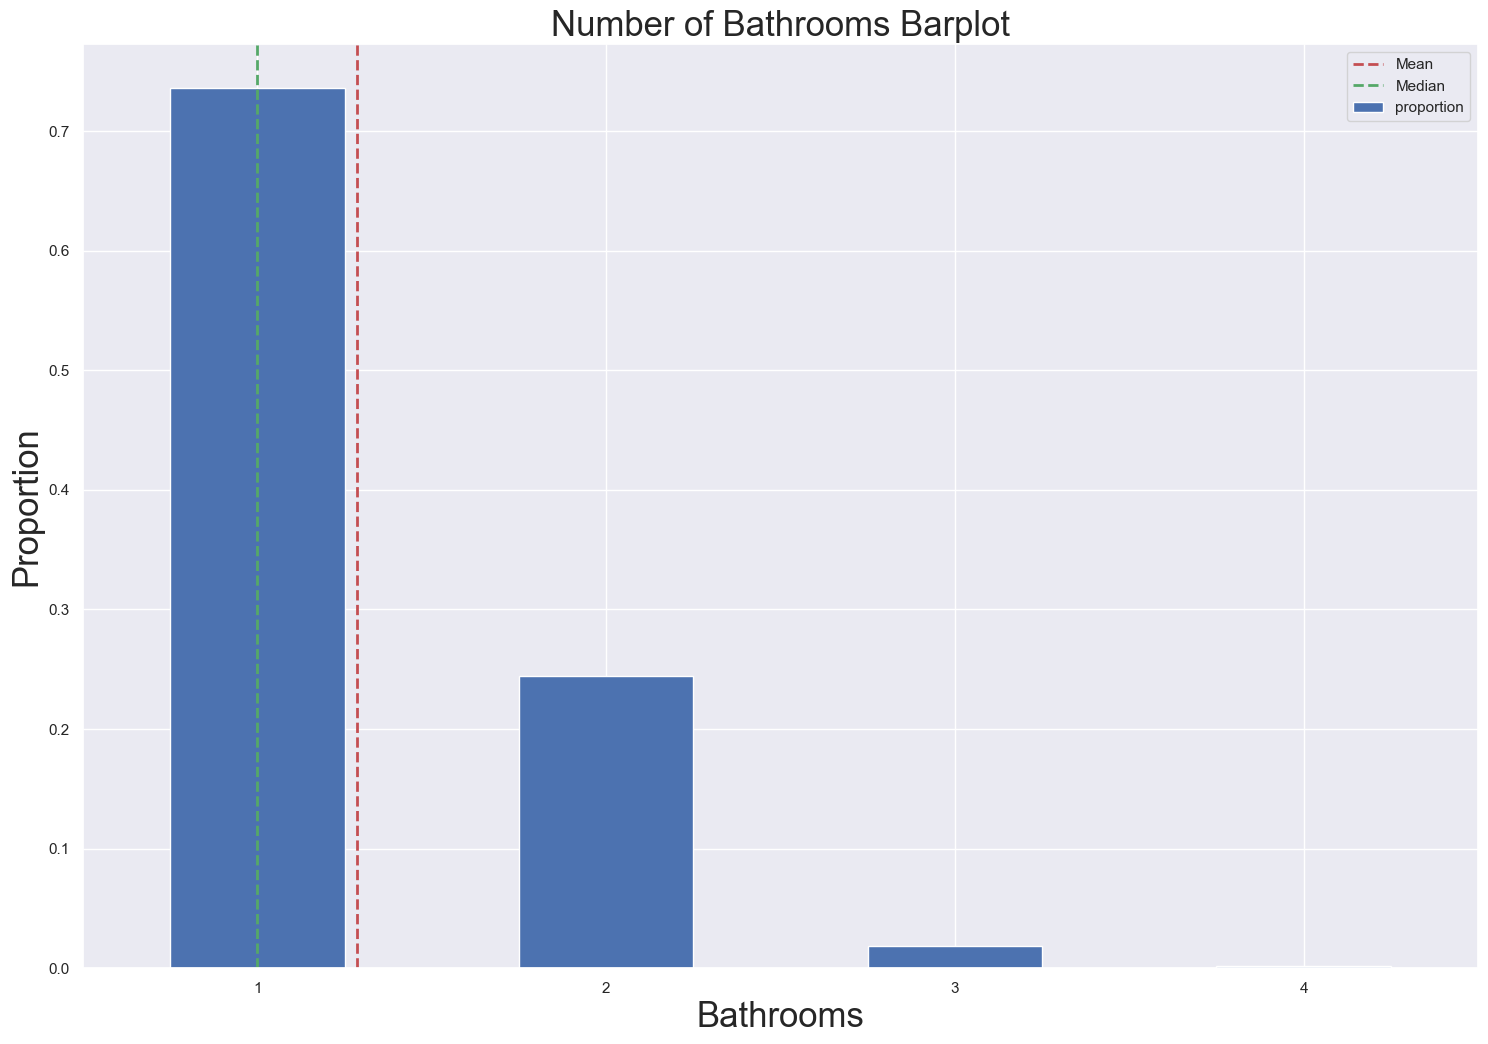

In [44]:
RelFreq_2 = houses['bathrooms'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_2.plot.bar(rot=0 )
plt.title('Number of Bathrooms Barplot', fontdict={'fontsize': 25})
plt.xlabel("Bathrooms", fontdict={'fontsize': 25})
plt.ylabel("Proportion", fontdict={'fontsize': 25})
plt.axvline(x=mean_2-1, color='r', linestyle='--', linewidth=2, label='Mean')
plt.axvline(x=median_2-1, color='g', linestyle='--', linewidth=2, label='Median')
plt.legend()
plt.show()

We can say that the most common number of bathrooms is 1 by far , and the plot shows that the less often seen numbers of bathrooms are 3 and 4, which makes sense. 

#### Relationship between `price` and `bathrooms`

We start by merging the category 3 and 4 as we saw in the previous study that the category 4 only has 1 observation.

In [45]:
houses['bathrooms'].replace({4:'>=3',3: '>=3'}, inplace=True)
ordered_categories = [1, 2, '>=3']

# We order the categories
houses['bathrooms'].value_counts().sort_index()


bathrooms
1      401
2      133
>=3     11
Name: count, dtype: int64

Now we just repeat the study by showing the stripplot, violin plot and by calculating some functions that will help us describe the variable price consitioned to each possible value of bathrooms.

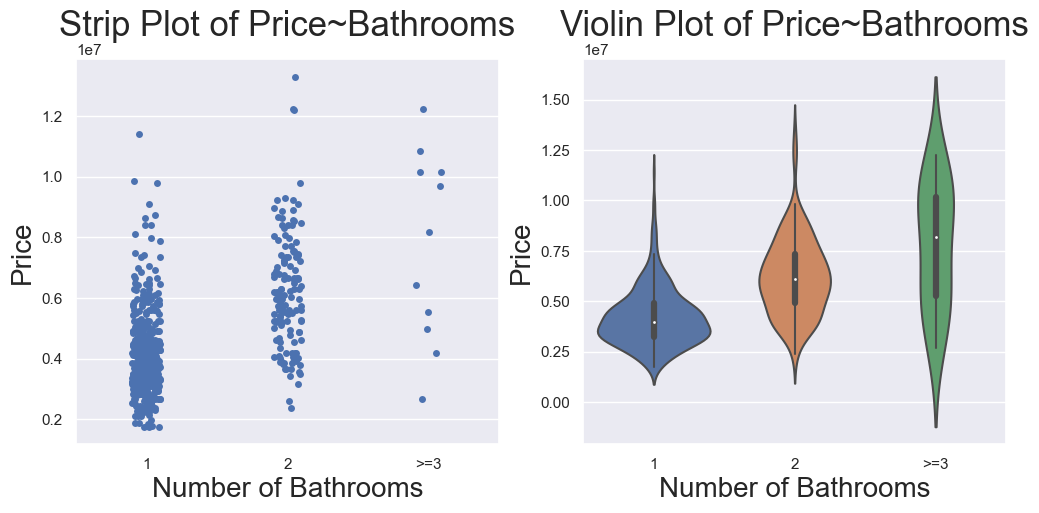

In [46]:
# Creation of 2 columns and 1 row subplot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# Subplot 1: Strip Plot
sns.stripplot(x=houses["bathrooms"], y=houses['price'],order=ordered_categories)
plt.xlabel('Number of Bathrooms', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Strip Plot of Price~Bathrooms', fontdict={'fontsize': 25})

# Subplot 2: Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x='bathrooms', y='price', data=houses,order=ordered_categories)
plt.xlabel('Number of Bathrooms', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Violin Plot of Price~Bathrooms', fontdict={'fontsize': 25})


# Plot display
plt.show()

Again, just like happenned with bedrooms, it feels like the price and its variance both grow as the number of bathrooms increase.

The increase of variance can be seen in the stripplot by observing how the dispersion of the points tends to grow, and in the violinplot we identify it by seeing how the plot tends to flatten as the number of bathrooms grow.


In [47]:
houses.groupby('bathrooms')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
bathrooms,,,,,,,,
1,401.0,4.206913e+06,1.432609e+06,1750000.0,3234000.0,3990000.0,4900000.0,11410000.0
2,133.0,6.209206e+06,1.916503e+06,2380000.0,4893000.0,6090000.0,7350000.0,13300000.0
>=3,11.0,7.733727e+06,3.133416e+06,2660000.0,5250000.0,8190000.0,10150000.0,12250000.0


The growth in both the mean and the std is much bigger in this case than in the bedrooms one, however it stands out how the house with the highest price is spotted in the category 2 and not in the >=3 one.
Despite this fact, both the mean and the median of the category >=3 are the highest by far, so it feels like even though the amount of observations in this category is pretty low, it really makes a difference in the price of a house to have more than 3 bathrooms.

### Variable `stories`

We move on to studying the variable stories, which logically represents the amount of floors/stories in the observed houses.

In [48]:
print(houses['stories'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
AbsFreq_3 = houses['stories'].value_counts().sort_index()
print(AbsFreq_3)
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['stories'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      4
top         2
freq      238
Name: stories, dtype: int64
------------------------------ 

Absolute Frequency: 

stories
1    227
2    238
3     39
4     41
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

stories
1    0.416514
2    0.436697
3    0.071560
4    0.075229
Name: proportion, dtype: float64
------------------------------ 



In [49]:
mean_3 = (AbsFreq_3.index.astype(int)*AbsFreq_3).sum()/AbsFreq_3.values.sum()
print('The mean of the stories variable is: ', mean_3)
print('\n','-'*70,'\n')
print('The mode of the stories variable is: ', houses['stories'].mode().values[0])
print('\n','-'*70,'\n')
print('The first quartile of the stories variable is: ', houses['stories'].sort_values().values[len(houses) // 4])
print('\n','-'*70,'\n')
print('The third quartile of the stories variable is: ', houses['stories'].sort_values().values[3*len(houses) // 4])
print('\n','-'*70,'\n')
median_3 = houses['stories'].sort_values().values[len(houses) // 2]
print('The median of the stories variable is: ', median_3)
print('\n','-'*70,'\n')
print('The minimum value of the stories variable is: ', houses['stories'].sort_values().values[0])
print('\n','-'*70,'\n')
print('The maximum value of the stories variable is: ', houses['stories'].sort_values().values[-1])
print('\n','-'*70,'\n')
print('The standard deviation of the stories variable is: ', np.sqrt(((AbsFreq_3.index.astype(int) - mean_3) ** 2 * AbsFreq_3).sum() / AbsFreq_3.sum()),'\n')

The mean of the stories variable is:  1.8055045871559634

 ---------------------------------------------------------------------- 

The mode of the stories variable is:  2

 ---------------------------------------------------------------------- 

The first quartile of the stories variable is:  1

 ---------------------------------------------------------------------- 

The third quartile of the stories variable is:  2

 ---------------------------------------------------------------------- 

The median of the stories variable is:  2

 ---------------------------------------------------------------------- 

The minimum value of the stories variable is:  1

 ---------------------------------------------------------------------- 

The maximum value of the stories variable is:  4

 ---------------------------------------------------------------------- 

The standard deviation of the stories variable is:  0.8666962328697991 



Just like it could be expected, the majority of the houses in the dataset have either 1 or 2 floors. Lets dig into this tendency by plotting some graphics.

As we are doing in the rest of categorical variables, we graphicate a barplot to study the variable. There are other plots, such as the barplot with absolute frequencies or the pieplot, but as we can see, the information obtained from them is the same.

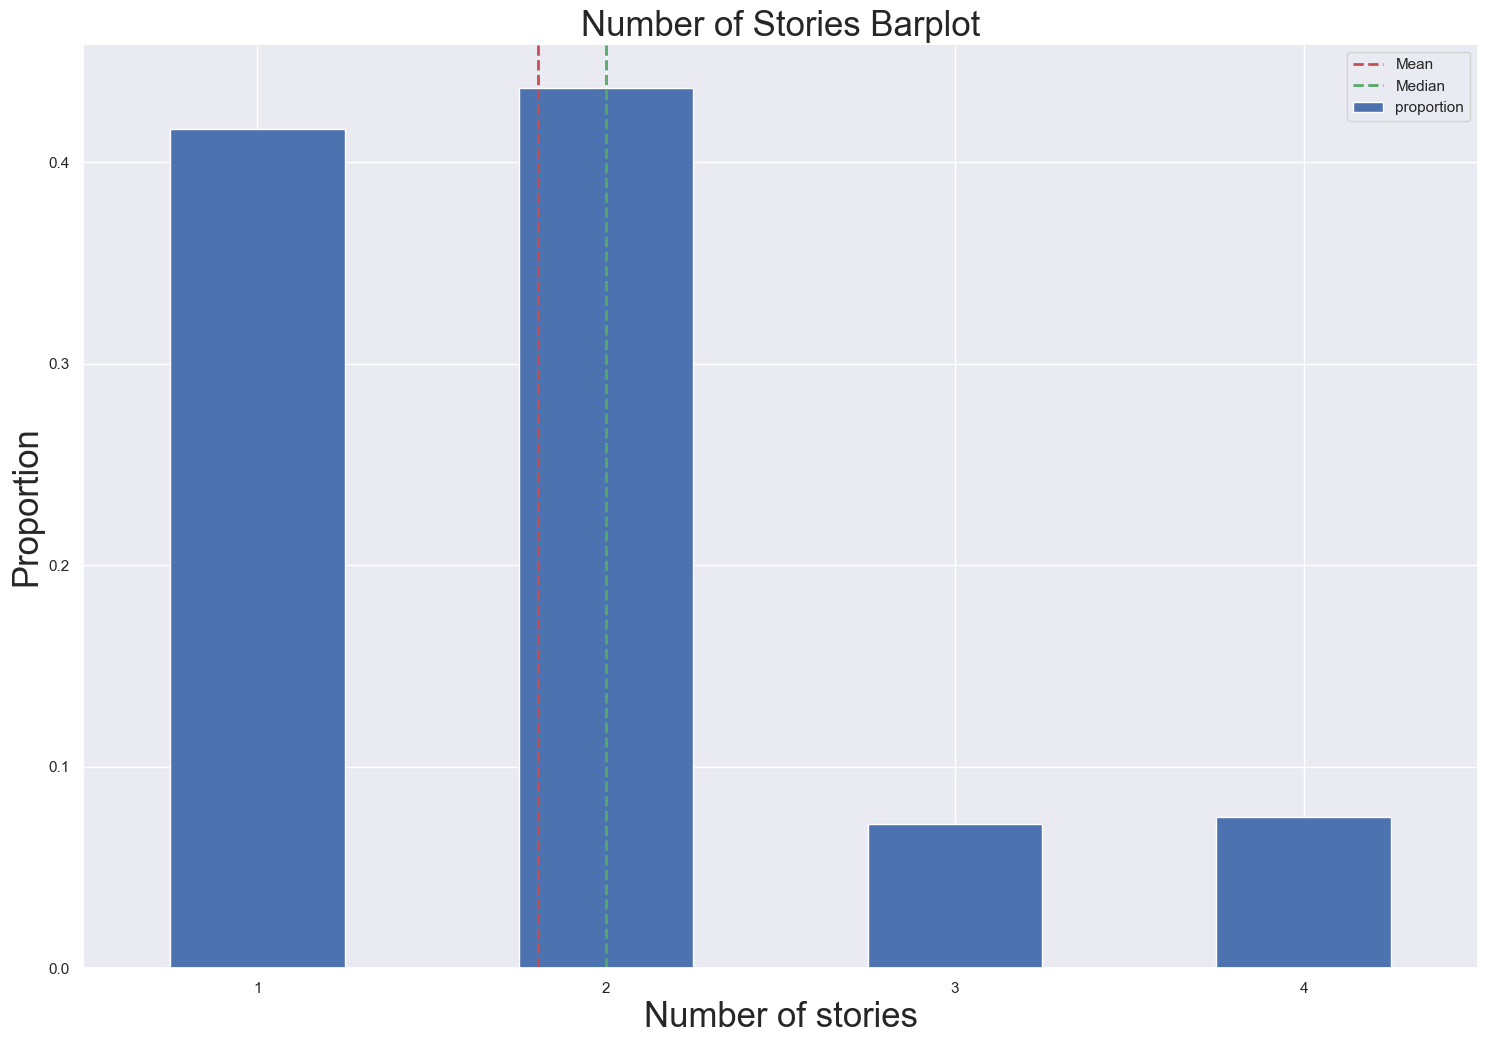

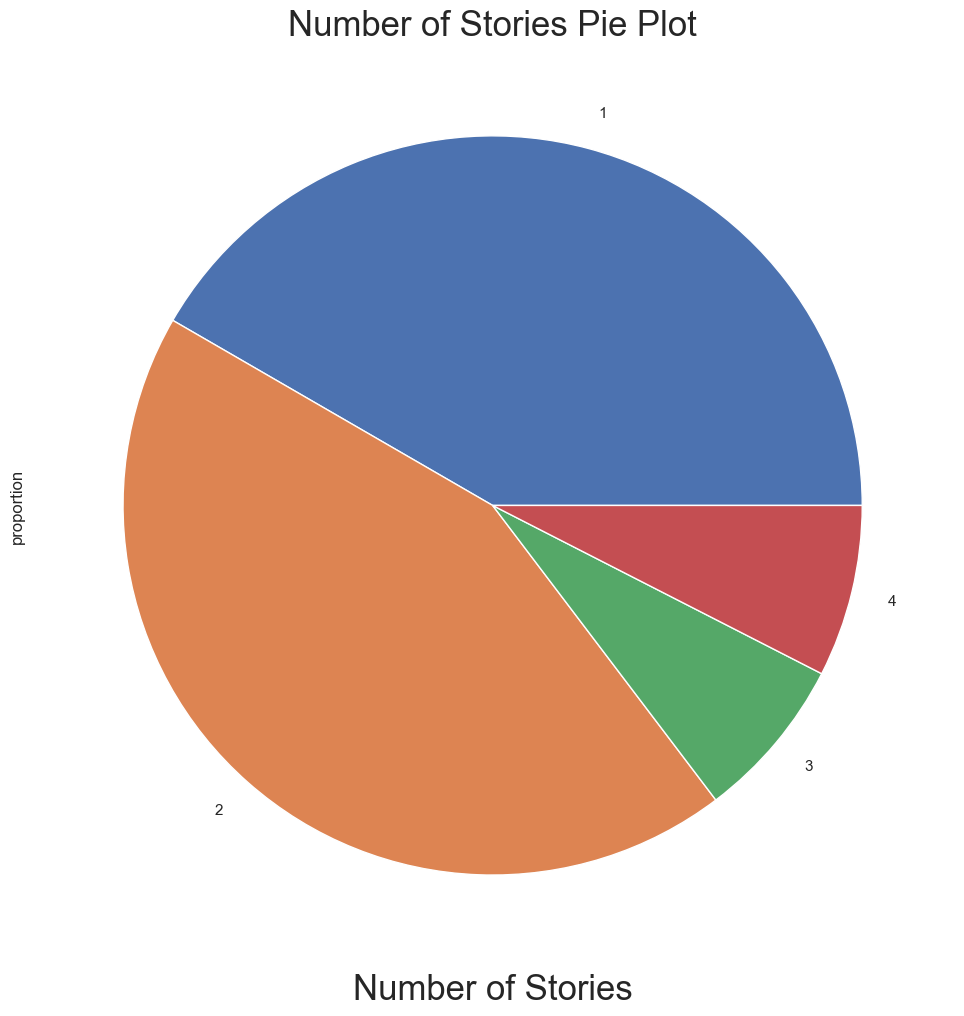

In [50]:
RelFreq_3 = houses['stories'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_3.plot.bar(rot=0 )
plt.xlabel("Number of stories", fontdict={'fontsize': 25})
plt.ylabel("Proportion", fontdict={'fontsize': 25})
plt.title('Number of Stories Barplot', fontdict={'fontsize': 25})

plt.axvline(x=mean_3-1, color='r', linestyle='--', linewidth=2, label='Mean')
plt.axvline(x=median_3-1, color='g', linestyle='--', linewidth=2, label='Median')
plt.legend()
plt.show()

plot = RelFreq_3.plot.pie(rot=0)
plt.xlabel("Number of Stories", fontdict={'fontsize': 25})
plt.title('Number of Stories Pie Plot', fontdict={'fontsize': 25})
plt.show()

#### Relationship between `price` and `stories`.

In this case, it feels like there is no need to merge any categories, as every level of the factor has a decent amount of observations, so we move on to plotting the graphics.

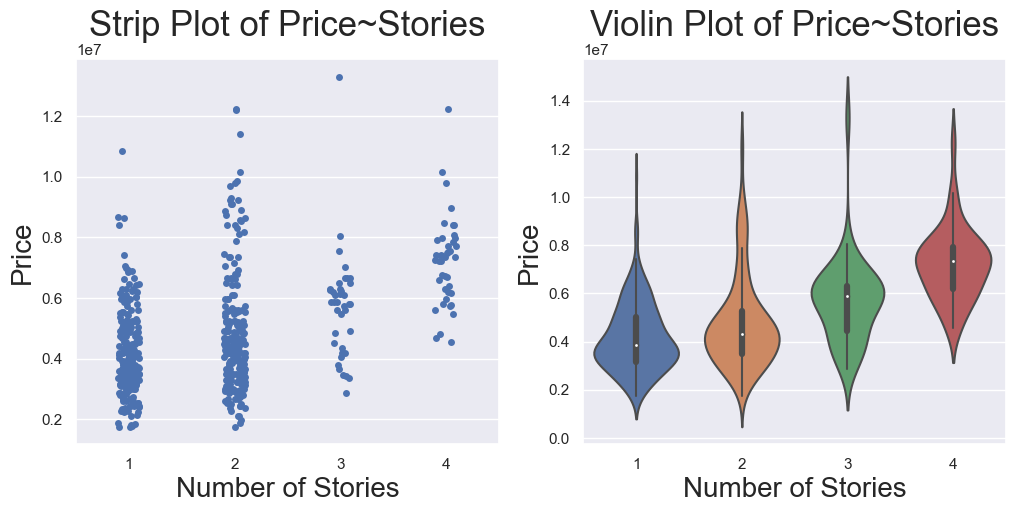

In [51]:
# Creation of 2 columns and 1 row subplot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# Subplot 1: Strip Plot
sns.stripplot(x=houses["stories"], y=houses['price'])
plt.xlabel('Number of Stories', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Strip Plot of Price~Stories', fontdict={'fontsize': 25})

# Subplot 2: Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x='stories', y='price', data=houses)
plt.xlabel('Number of Stories', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Violin Plot of Price~Stories', fontdict={'fontsize': 25})


# Plot display
plt.show()

Even though it is harder to come to any conclussion with this graphics due to the disperssion in every category of the variable, it is true that the violinplot shows an increasing tendency in the median of the variable.

It is also of interest to observe the outliers of the variable, showing that houses with 1 or 2 houses can be really expensive, yet there are no houses with 3 or 4 stories that are really cheap.

We will be able to unserstand the variable way better by calculating its mean,median,min,... in every category


In [52]:
houses.groupby('stories')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
stories,,,,,,,,
1,227.0,4.170659e+06,1.424693e+06,1750000.0,3150000.0,3850000.0,5019000.0,10850000.0
2,238.0,4.764074e+06,1.925702e+06,1750000.0,3500000.0,4308500.0,5250000.0,12250000.0
3,39.0,5.685436e+06,1.764089e+06,2852500.0,4427500.0,5873000.0,6296500.0,13300000.0
4,41.0,7.208450e+06,1.494494e+06,4550000.0,6195000.0,7350000.0,7910000.0,12250000.0


The table confirms our suspicions as from it we can see how:
    
    1. Both the mean and the median of the price grow considerably as the number of the stories in the house grow
    2. Even though the min tends to grow a lot, we cannot spot the same effect in the max
    3. The variable is close to equally dispersed in every category

### Variable `mainroad`

It is a binary variable so it can only take two values: whether the house is connected to the main road (Yes/No).

First of all, we create the same previous tables of frequencies of our variable.

In [53]:
print(houses['mainroad'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
print(houses['mainroad'].value_counts().sort_index())
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['mainroad'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      2
top       yes
freq      468
Name: mainroad, dtype: object
------------------------------ 

Absolute Frequency: 

mainroad
no      77
yes    468
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

mainroad
no     0.141284
yes    0.858716
Name: proportion, dtype: float64
------------------------------ 



Finally, we represent a barplot with the relative frequencies.


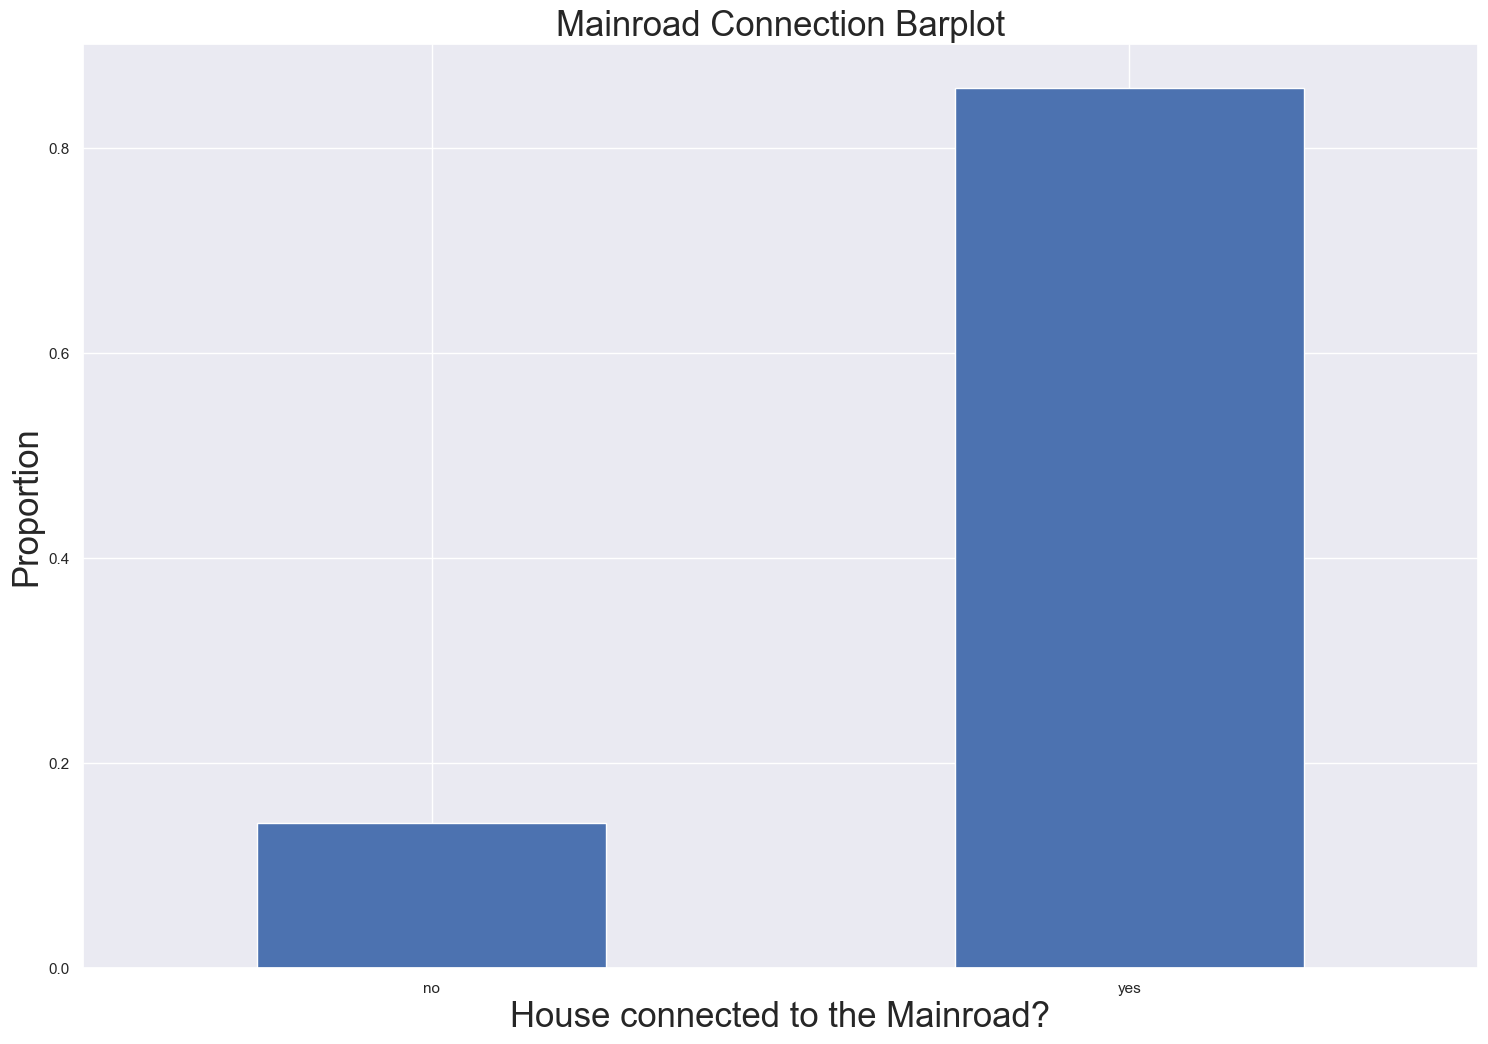

In [54]:
RelFreq_4 = houses['mainroad'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_4.plot.bar(rot=0)
plt.title('Mainroad Connection Barplot', fontdict={'fontsize': 25})
plt.xlabel("House connected to the Mainroad?", fontdict={'fontsize': 25})
plt.ylabel("Proportion", fontdict={'fontsize': 25})
plt.show()

As a result of our plot, we can affirm that being connected to the mainroad is much more frequent than not being connected to the mainroad.

#### Relationship between `price` and `mainroad` 

We continue studying the relationship between the variables with a strip plot and a violin plot.

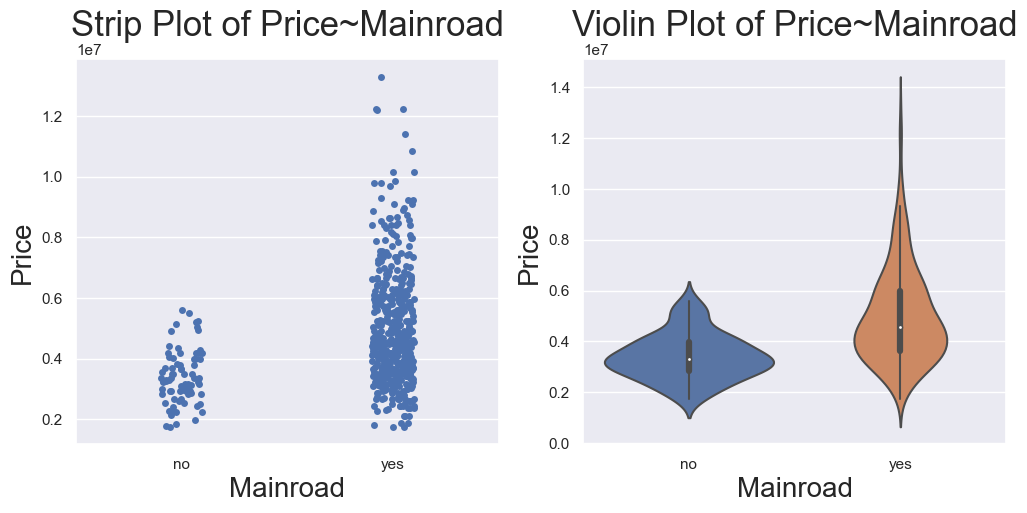

In [55]:
# Creation of 2 columns and 1 row subplot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# Subplot 1: Strip Plot
sns.stripplot(x=houses["mainroad"], y=houses['price'])
plt.xlabel('Mainroad', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Strip Plot of Price~Mainroad', fontdict={'fontsize': 25})

# Subplot 2: Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x='mainroad', y='price', data=houses)
plt.xlabel('Mainroad', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Violin Plot of Price~Mainroad', fontdict={'fontsize': 25})

# Plot display
plt.show()

As it is easily determined, the price of the house has a strong relation with the connection to the mainroad. Few houses are spotted with no connection, all of them with a clearly low or mid price. Even though there is a huge difference in the number of houses for each category, the values observed are much higher in terms of mean, max, and quartiles.

In [56]:
houses.groupby('mainroad')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
mainroad,,,,,,,,
no,77.0,3.398905e+06,8.947355e+05,1750000.0,2835000.0,3290000.0,3990000.0,5600000.0
yes,468.0,4.991777e+06,1.893639e+06,1750000.0,3638250.0,4550000.0,5967500.0,13300000.0


The information described in the previous table is also reflected in the plots displayed, but the analitic study is useful to portray those differences.

### Variable `guestroom`

It is also a binary variable so it can only take two values: whether the house has a guest room (Yes/No). This column is easy to study, but could be important to predict the increment of the price of a house.

In [57]:
print(houses['guestroom'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
print(houses['guestroom'].value_counts().sort_index())
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['guestroom'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      2
top        no
freq      448
Name: guestroom, dtype: object
------------------------------ 

Absolute Frequency: 

guestroom
no     448
yes     97
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

guestroom
no     0.822018
yes    0.177982
Name: proportion, dtype: float64
------------------------------ 



Finally, we represent a barplot with the relative frequencies.

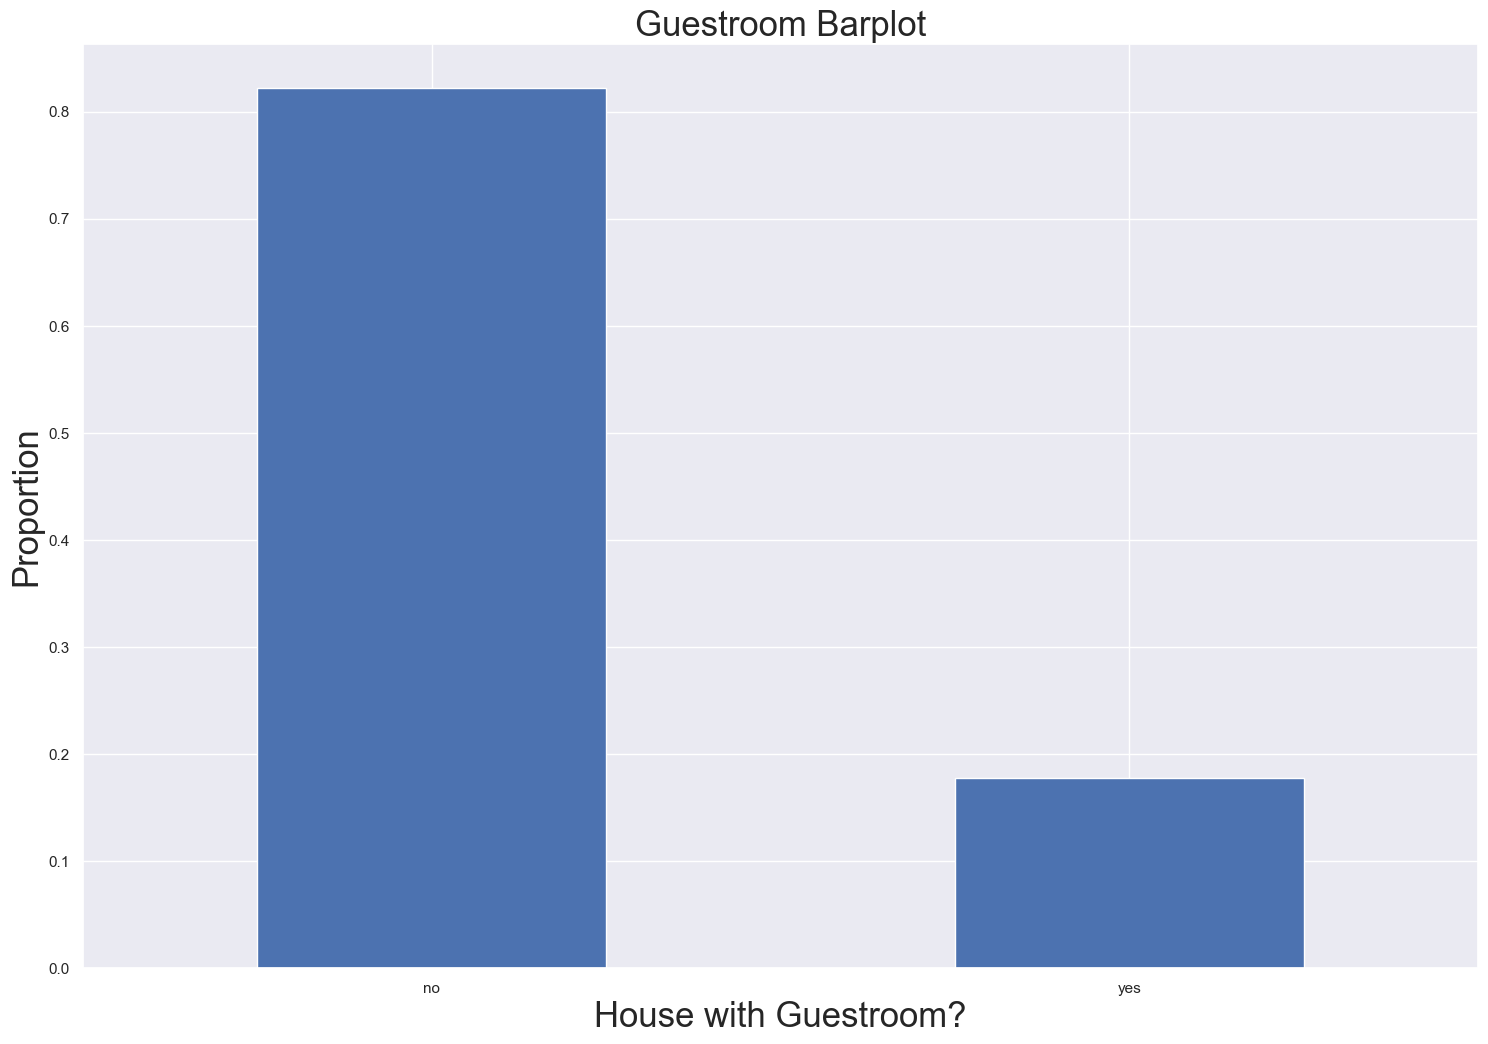

In [58]:
RelFreq_5 = houses['guestroom'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_5.plot.bar(rot=0)
plt.title('Guestroom Barplot', fontdict={'fontsize': 25})
plt.xlabel("House with Guestroom?", fontdict={'fontsize': 25})
plt.ylabel("Proportion", fontdict={'fontsize': 25})
plt.show()

The next variable to study is going to be `basement`.

#### Relationship between `price` and `guestroom`

We keep on doing the graphics to present possible relations between dichotomous variables and the price.

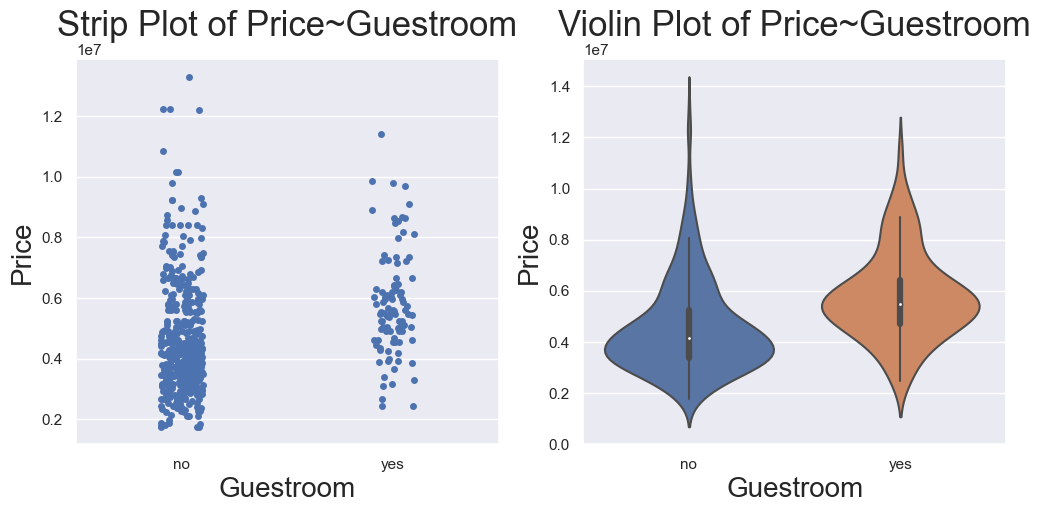

In [59]:
# Creation of 2 columns and 1 row subplot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# Subplot 1: Strip Plot
sns.stripplot(x=houses["guestroom"], y=houses['price'])
plt.xlabel('Guestroom', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Strip Plot of Price~Guestroom', fontdict={'fontsize': 25})

# Subplot 2: Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x='guestroom', y='price', data=houses)
plt.xlabel('Guestroom', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Violin Plot of Price~Guestroom', fontdict={'fontsize': 25})

# Plot display
plt.show()

In this case it has a more complex behaviour. There are not differences in the max nor min price, but it seems that the avergae price could be higher.

In [60]:
houses.groupby('guestroom')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
guestroom,,,,,,,,
no,448.0,4.544546e+06,1.827182e+06,1750000.0,3347750.0,4165000.0,5258750.0,13300000.0
yes,97.0,5.792897e+06,1.727829e+06,2450000.0,4690000.0,5495000.0,6419000.0,11410000.0


As it was foreseen, the average quartile values for the price are higher, but the spectrum of prices is more or less the same. The conclusion is that has a slight dependency on the fact that the house has a guestroom.

### Variable `basement`

In this case, the variable basement is binary and, as could be expected, it represents if a house does or does not have a basement. This variable will be of interest when we try to model the price of a given house, as having a basement always increases the value of a house, so this one will probably turn out to be a significant variable for the price.

In [61]:
print(houses['basement'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
print(houses['basement'].value_counts().sort_index())
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['basement'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      2
top        no
freq      354
Name: basement, dtype: object
------------------------------ 

Absolute Frequency: 

basement
no     354
yes    191
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

basement
no     0.649541
yes    0.350459
Name: proportion, dtype: float64
------------------------------ 



As we can see, about a 65% of the houses in the dataset do not have a basement. Let´s observe this proportion more appropiately using graphics

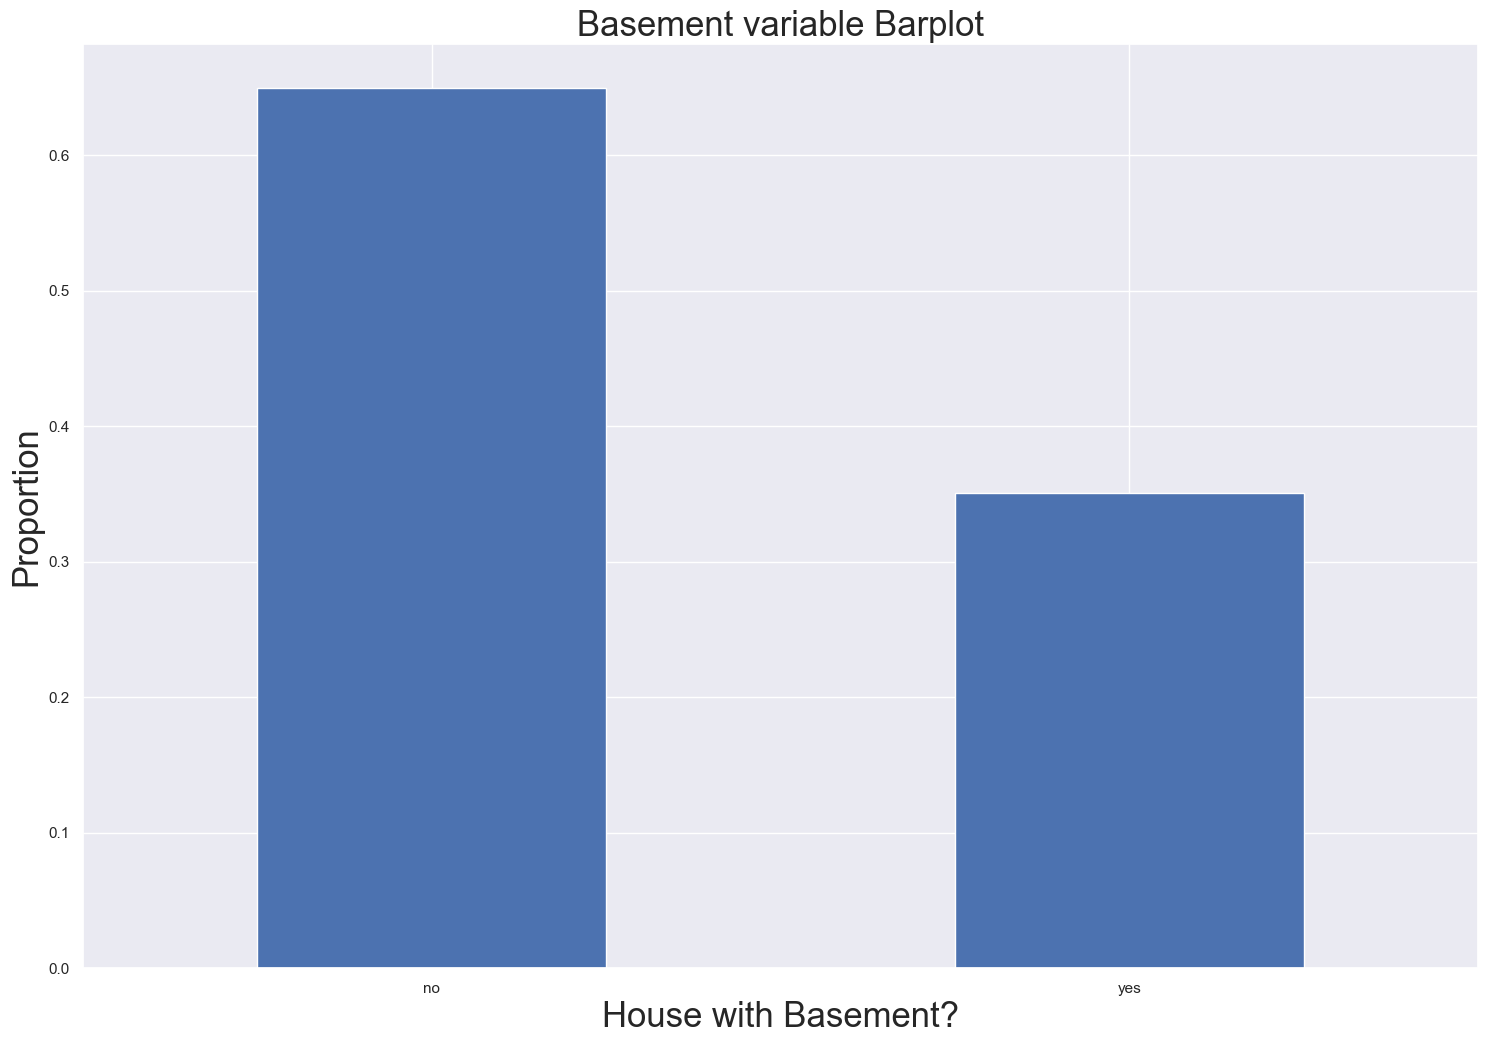

In [62]:
RelFreq_6 = houses['basement'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_6.plot.bar(rot=0)
plt.title('Basement variable Barplot', fontdict={'fontsize': 25})
plt.xlabel("House with Basement?", fontdict={'fontsize': 25})
plt.ylabel("Proportion", fontdict={'fontsize': 25})
plt.show()

#### Relationship between `price` and `basement`

We repeat the process for this categorical variable.

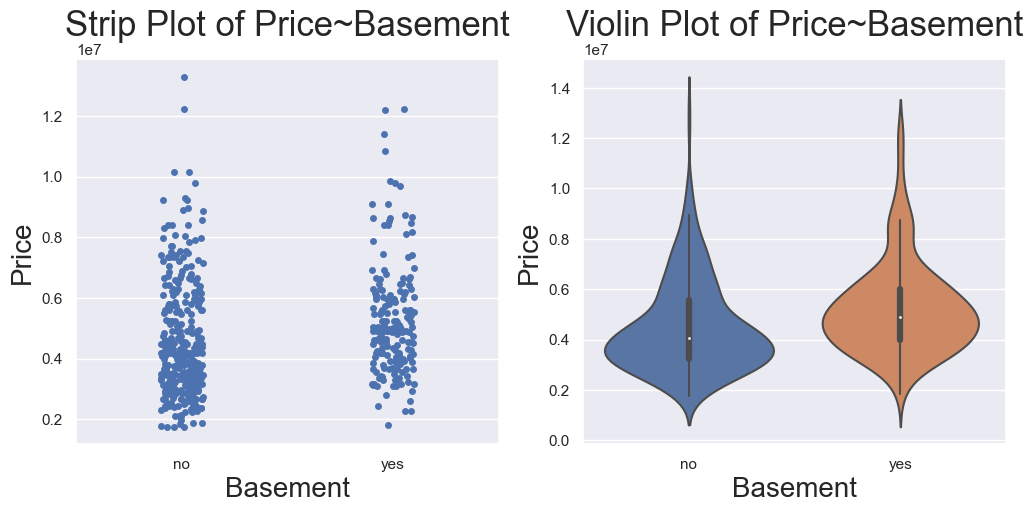

In [63]:
# Creation of 2 columns and 1 row subplot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# Subplot 1: Strip Plot
sns.stripplot(x=houses["basement"], y=houses['price'])
plt.xlabel('Basement', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Strip Plot of Price~Basement', fontdict={'fontsize': 25})

# Subplot 2: Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x='basement', y='price', data=houses)
plt.xlabel('Basement', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Violin Plot of Price~Basement', fontdict={'fontsize': 25})

# Plot display
plt.show()

In this case, it seems that the basement is one of the least related variables. It is true that there are a more quantity of low prices without a basement, but it is not a huge difference.

In [64]:
houses.groupby('basement')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
basement,,,,,,,,
no,354.0,4.509966e+06,1.841116e+06,1750000.0,3228750.0,4077500.0,5556250.0,13300000.0
yes,191.0,5.242615e+06,1.835394e+06,1820000.0,3998750.0,4900000.0,6020000.0,12250000.0


Inthe analytical study we can observe that slight growth in the mean of the price when the house has a basement.

### Variable `hotwaterheating`

The next variable is again binary, and it explains whether a house includes a system to heat water or not. Again, it seems that this variable will be significant once we are trying to predict the price of a house, as having a water-heating system will always increase the value of a house.

In [65]:
print(houses['hotwaterheating'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
print(houses['hotwaterheating'].value_counts().sort_index())
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['hotwaterheating'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      2
top        no
freq      520
Name: hotwaterheating, dtype: object
------------------------------ 

Absolute Frequency: 

hotwaterheating
no     520
yes     25
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

hotwaterheating
no     0.954128
yes    0.045872
Name: proportion, dtype: float64
------------------------------ 



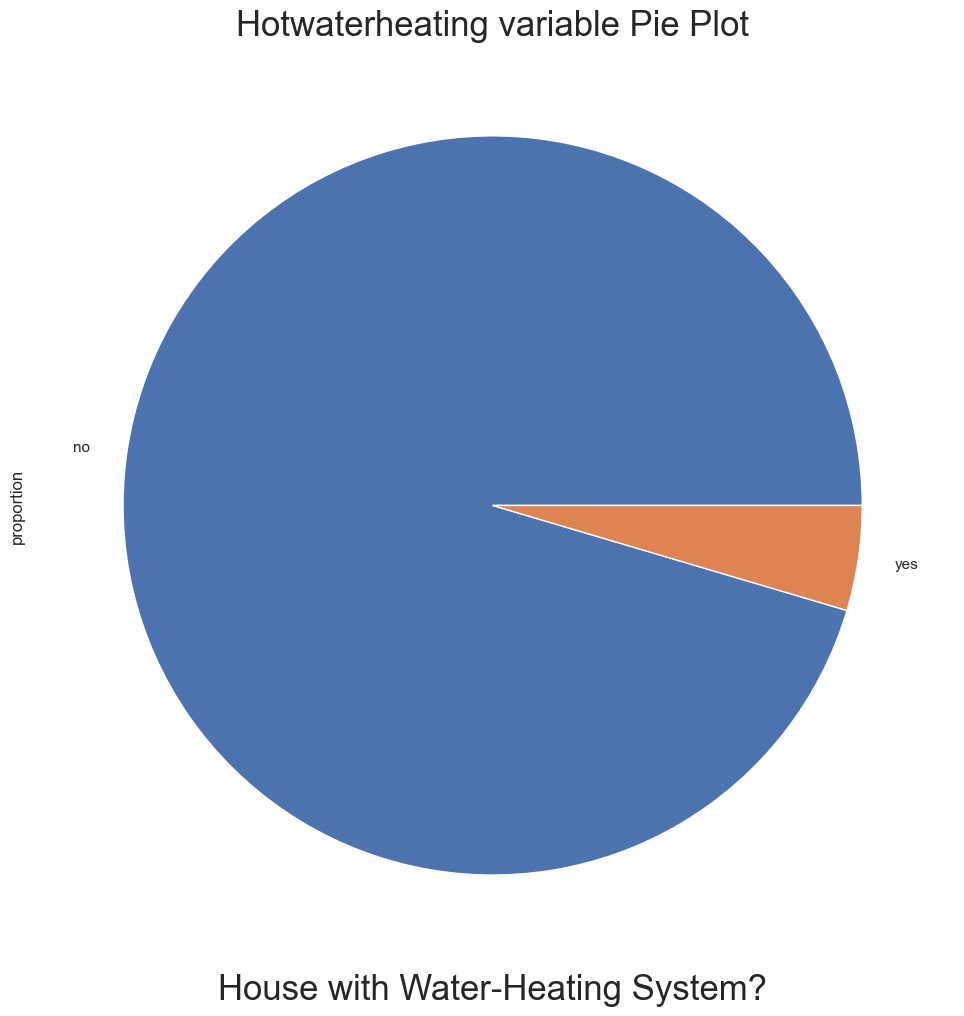

In [66]:
RelFreq_7 = houses['hotwaterheating'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_7.plot.pie(rot=0)
plt.title('Hotwaterheating variable Pie Plot', fontdict={'fontsize': 25})
plt.xlabel("House with Water-Heating System?", fontdict={'fontsize': 25})
plt.show()

In this case, the previous analysis shows how only about a 4.5% of the houses studied do have a water-heating system.

#### Relationship between `price` and `hotwaterheating`

This variable could be more difficult to use due to the unbalance in the two categories.

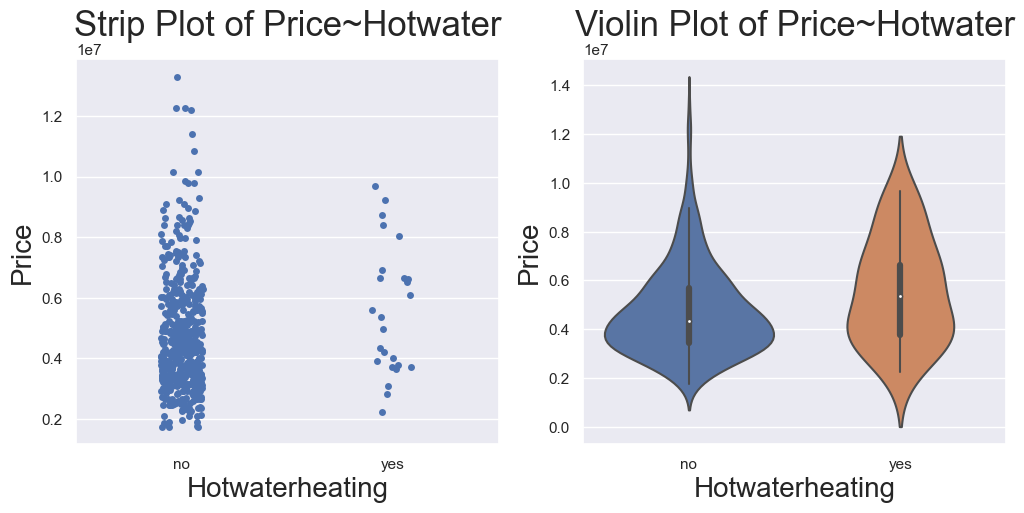

In [67]:
# Creation of 2 columns and 1 row subplot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# Subplot 1: Strip Plot
sns.stripplot(x=houses["hotwaterheating"], y=houses['price'])
plt.xlabel('Hotwaterheating', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Strip Plot of Price~Hotwater', fontdict={'fontsize': 25})

# Subplot 2: Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x='hotwaterheating', y='price', data=houses)
plt.xlabel('Hotwaterheating', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Violin Plot of Price~Hotwater', fontdict={'fontsize': 25})

# Plot display
plt.show()

As we expected, there are very few values for houses with a hot water heating system installed, so the mean, quartiles and the rest of metrics won't be as useful as before.

In [68]:
houses.groupby('hotwaterheating')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
hotwaterheating,,,,,,,,
no,520.0,4.728593e+06,1.850960e+06,1750000.0,3430000.0,4329500.0,5674375.0,13300000.0
yes,25.0,5.559960e+06,2.127208e+06,2240000.0,3780000.0,5383000.0,6650000.0,9681000.0


Nonetheless, we can also appreciate an obvious difference in the price.

### Variable `airconditioning`

The analysis continues with the variable airconditioning, which, as expected, is a binary variable indicating if a house has an air conditioning system or not.

In [69]:
print(houses['airconditioning'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
print(houses['airconditioning'].value_counts().sort_index())
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['airconditioning'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      2
top        no
freq      373
Name: airconditioning, dtype: object
------------------------------ 

Absolute Frequency: 

airconditioning
no     373
yes    172
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

airconditioning
no     0.684404
yes    0.315596
Name: proportion, dtype: float64
------------------------------ 



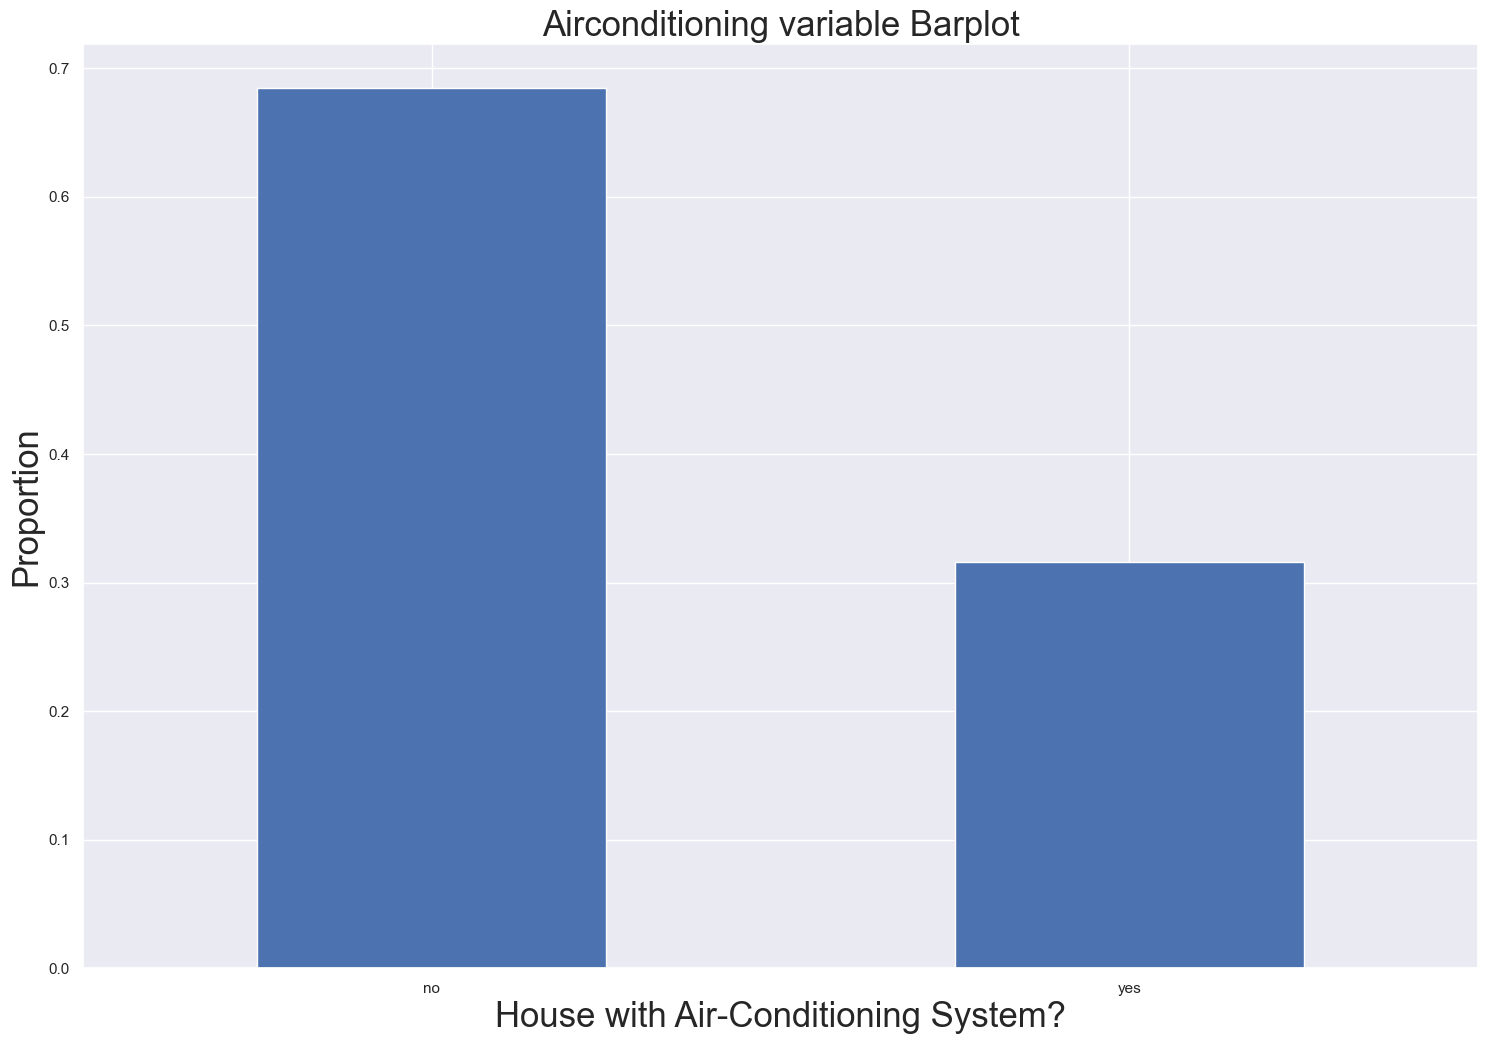

In [70]:
RelFreq_8 = houses['airconditioning'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_8.plot.bar(rot=0)
plt.title('Airconditioning variable Barplot', fontdict={'fontsize': 25})
plt.xlabel("House with Air-Conditioning System?", fontdict={'fontsize': 25})
plt.ylabel("Proportion", fontdict={'fontsize': 25})
plt.show()

As we can see, having an air conditioning system(31.5%) is more likely among the houses in the dataset than having a water-heating system(4.5%), but less likely than having a basement(35%).

#### Relationship between `price` and `airconditioning`

We continue the study by plotting some useful graphics.

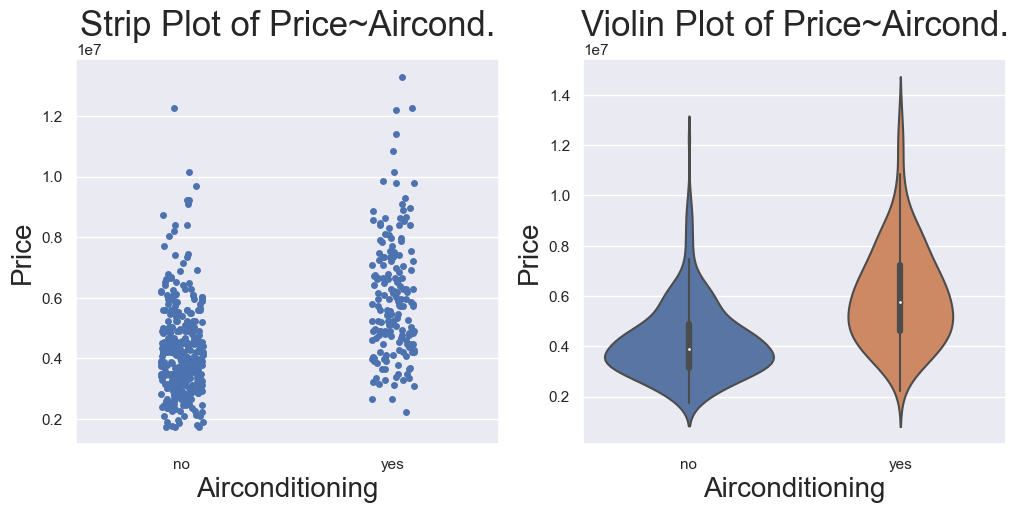

In [71]:
# Creation of 2 columns and 1 row subplot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# Subplot 1: Strip Plot
sns.stripplot(x=houses["airconditioning"], y=houses['price'])
plt.xlabel('Airconditioning', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Strip Plot of Price~Aircond.', fontdict={'fontsize': 25})

# Subplot 2: Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x='airconditioning', y='price', data=houses)
plt.xlabel('Airconditioning', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Violin Plot of Price~Aircond.', fontdict={'fontsize': 25})

# Plot display
plt.show()

It is easily determined that this column has a clear influence in the price of the house and each of the possible metrics: mean, median, min, max, quartiles, etc.

In [72]:
houses.groupby('airconditioning')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
airconditioning,,,,,,,,
no,373.0,4.191940e+06,1.493712e+06,1750000.0,3150000.0,3885000.0,4900000.0,12250000.0
yes,172.0,6.013221e+06,1.998149e+06,2233000.0,4602500.0,5757500.0,7218750.0,13300000.0


In the table above we can observe maybe one of the clearest separations between both classes.

### Variable `parking`

As we can imagine, this column specifies the number of parking spaces available in the house.

In [73]:
print(houses['parking'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
AbsFreq_4 = houses['parking'].value_counts().sort_index()
print(AbsFreq_4)
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['parking'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      4
top         0
freq      299
Name: parking, dtype: int64
------------------------------ 

Absolute Frequency: 

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

parking
0    0.548624
1    0.231193
2    0.198165
3    0.022018
Name: proportion, dtype: float64
------------------------------ 



It could be useful to measure some statistical values, such as the mode, median or standard deviation.

In [74]:
mean_4 = (AbsFreq_4.index.astype(int)*AbsFreq_4).sum()/AbsFreq_4.values.sum()
print('The mean of the parking variable is: ', mean_4)
print('\n','-'*70,'\n')
print('The mode of the parking variable is: ', houses['parking'].mode().values[0])
print('\n','-'*70,'\n')
print('The first quartile of the parking variable is: ', houses['parking'].sort_values().values[len(houses) // 4])
print('\n','-'*70,'\n')
print('The third quartile of the parking variable is: ', houses['parking'].sort_values().values[3*len(houses) // 4])
print('\n','-'*70,'\n')
median_4 = houses['parking'].sort_values().values[len(houses) // 2]
print('The median of the parking variable is: ', median_4)
print('\n','-'*70,'\n')
print('The minimum value of the parking variable is: ', houses['parking'].sort_values().values[0])
print('\n','-'*70,'\n')
print('The maximum value of the parking variable is: ', houses['parking'].sort_values().values[-1])
print('\n','-'*70,'\n')
print('The standard deviation of the parking variable is: ', np.sqrt(((AbsFreq_4.index.astype(int) - mean_3) ** 2 * AbsFreq_4).sum() / AbsFreq_4.sum()),'\n')

The mean of the parking variable is:  0.6935779816513762

 ---------------------------------------------------------------------- 

The mode of the parking variable is:  0

 ---------------------------------------------------------------------- 

The first quartile of the parking variable is:  0

 ---------------------------------------------------------------------- 

The third quartile of the parking variable is:  1

 ---------------------------------------------------------------------- 

The median of the parking variable is:  0

 ---------------------------------------------------------------------- 

The minimum value of the parking variable is:  0

 ---------------------------------------------------------------------- 

The maximum value of the parking variable is:  3

 ---------------------------------------------------------------------- 

The standard deviation of the parking variable is:  1.406182316778735 



We can observe that more than 2 places is really strange, and it is probably directly related with the price of the house. 

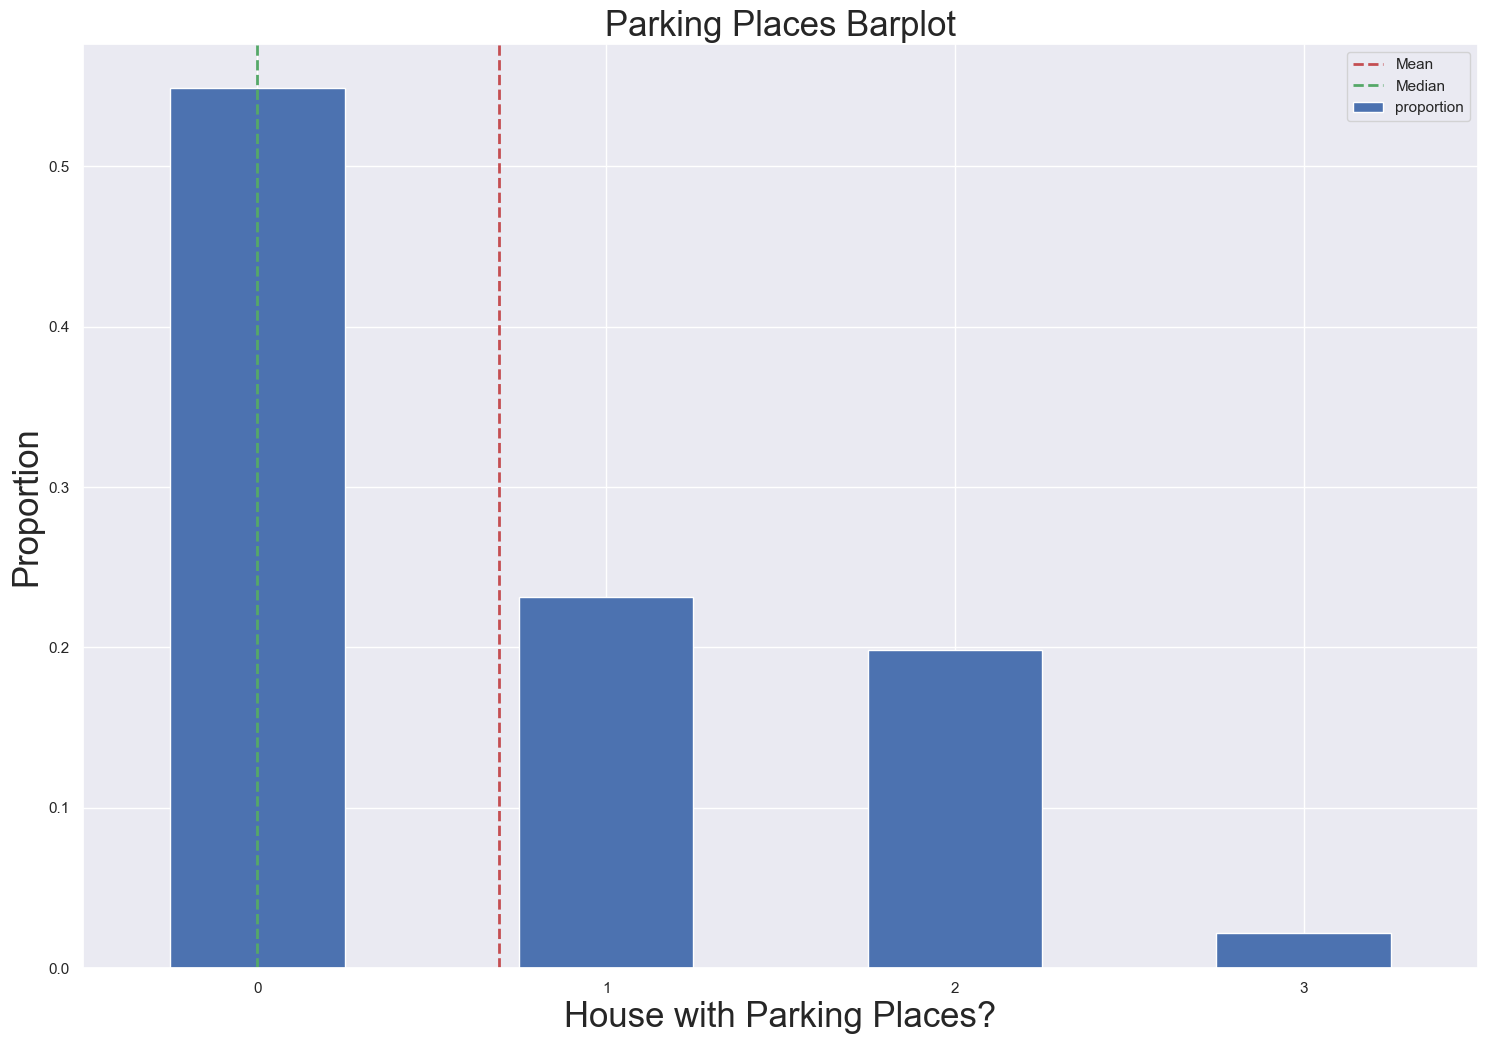

In [75]:
RelFreq_9 = houses['parking'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_9.plot.bar(rot=0)
plt.title('Parking Places Barplot', fontdict={'fontsize': 25})
plt.xlabel("House with Parking Places?", fontdict={'fontsize': 25})
plt.ylabel("Proportion", fontdict={'fontsize': 25})

plt.axvline(x=mean_4, color='r', linestyle='--', linewidth=2, label='Mean')
plt.axvline(x=median_4, color='g', linestyle='--', linewidth=2, label='Median')
plt.legend()

plt.show()

We could bin this variable into a dicotomic one that indicates wether the house has parking places or not, but it seems that we could lose valuable information for the next sections. 

#### Relationship between `price` and `parking`

We move on to studying if there is any significant relation between the variable we are willing to predict(price) and this variable parking.

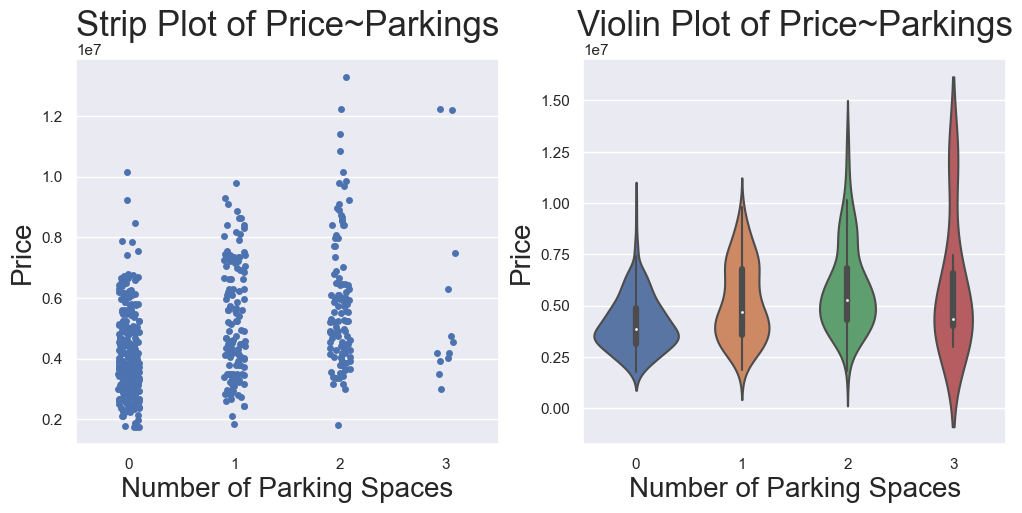

In [76]:
# Creation of 2 columns and 1 row subplot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# Subplot 1: Strip Plot
sns.stripplot(x=houses["parking"], y=houses['price'])
plt.xlabel('Number of Parking Spaces', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Strip Plot of Price~Parkings', fontdict={'fontsize': 25})

# Subplot 2: Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x='parking', y='price', data=houses)
plt.xlabel('Number of Parking Spaces', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Violin Plot of Price~Parkings', fontdict={'fontsize': 25})


# Plot display
plt.show()

Even though there is a clear tendency of growth of the price as the number of parking spots of the house grows, this tendency is much slighter than in some of the other variables of the study such as bathrooms or stories.

However, it is also importand to highlight how almos every house with a price over the million has more than 2 parking spaces, although as there are not many houses with such a high price, this fact may not be significant.

We can also observe from both plots how the variable tends to become more and more disperse.

In [77]:
houses.groupby('parking')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
parking,,,,,,,,
0,299.0,4.136017e+06,1.359445e+06,1750000.0,3150000.0,3850000.0,4900000.0,10150000.0
1,126.0,5.190389e+06,1.879971e+06,1855000.0,3552500.0,4690000.0,6807500.0,9800000.0
2,108.0,5.896328e+06,2.169085e+06,1820000.0,4324250.0,5302500.0,6816250.0,13300000.0
3,12.0,5.867167e+06,3.210310e+06,3010000.0,3998750.0,4375000.0,6597500.0,12250000.0


In this case, there are two variables of special interest :

    1. The min in the category 3 is so much higher than in the rest of the categories. This may be explained by the size of the sample of houses with 3 parking spots, but still it is an incredibly high difference that needs to be highlighted
    
    2. The mean grows a lot from 0 to 1 and from 1 to 2, but it actually lowers from 2 to 3, indicating that even though having 3 parking spaces almost secures that the house will not be really cheap, it does not give much more information than that.  

### Variable `prefarea`

This variable informs about the area or neighbourhood, if it is considered as preferred or not.

In [78]:
print(houses['prefarea'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
print(houses['prefarea'].value_counts().sort_index())
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['prefarea'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      2
top        no
freq      417
Name: prefarea, dtype: object
------------------------------ 

Absolute Frequency: 

prefarea
no     417
yes    128
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

prefarea
no     0.765138
yes    0.234862
Name: proportion, dtype: float64
------------------------------ 



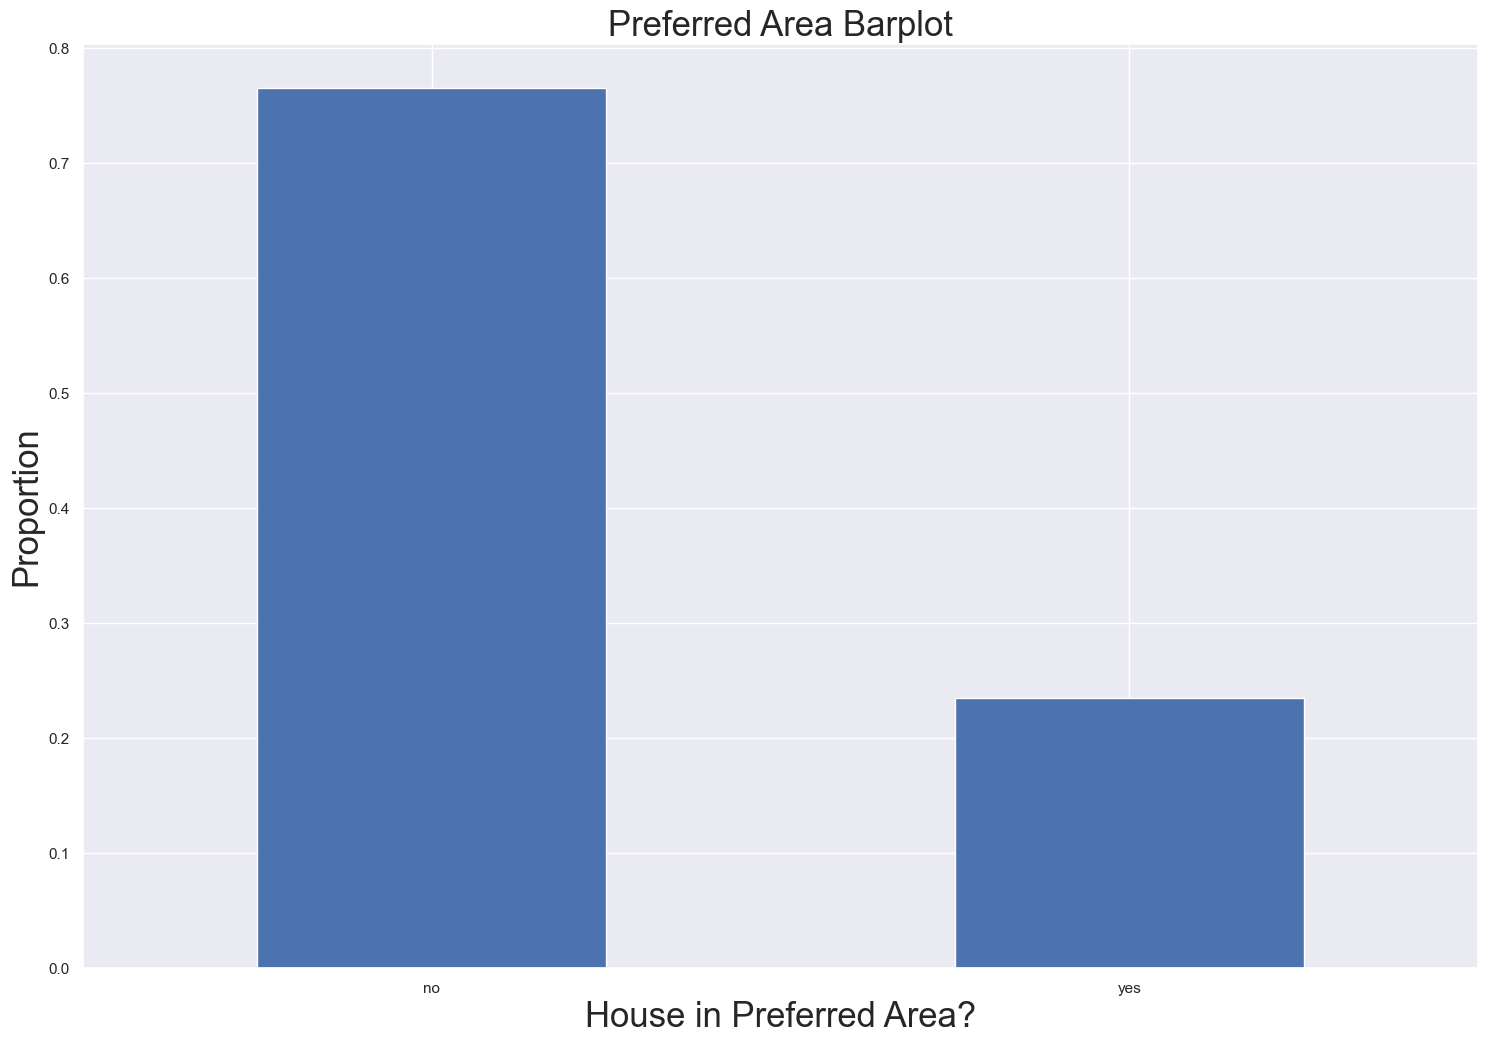

In [79]:
RelFreq_10 = houses['prefarea'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_10.plot.bar(rot=0)
plt.title('Preferred Area Barplot', fontdict={'fontsize': 25})
plt.xlabel("House in Preferred Area?", fontdict={'fontsize': 25})
plt.ylabel("Proportion", fontdict={'fontsize': 25})
plt.show()

The results indicate that the majority of the homes are located in disliked locations, something usual in a random houses data set, due to the percentage of each of them in a city.

#### Relationship between `price` and `prefarea`

In order to find out the relationship among those variables, we start with the display of a strip plot and a violin plot.

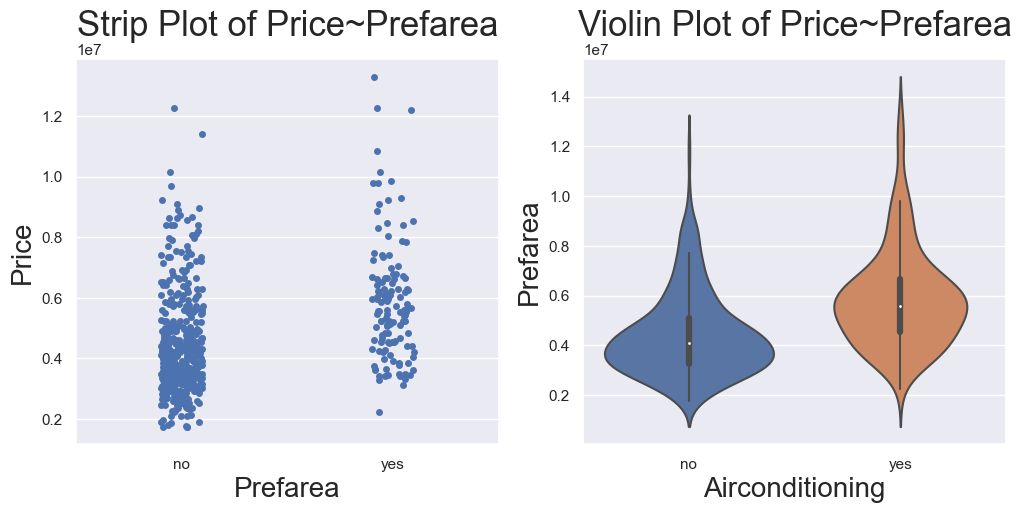

In [80]:
# Creation of 2 columns and 1 row subplot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# Subplot 1: Strip Plot
sns.stripplot(x=houses["prefarea"], y=houses['price'])
plt.xlabel('Prefarea', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Strip Plot of Price~Prefarea', fontdict={'fontsize': 25})

# Subplot 2: Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x='prefarea', y='price', data=houses)
plt.xlabel('Airconditioning', fontdict={'fontsize': 20})
plt.ylabel('Prefarea', fontdict={'fontsize': 20})
plt.title('Violin Plot of Price~Prefarea', fontdict={'fontsize': 25})

# Plot display
plt.show()

The graphics may indicate a difference in the price, but there is also an unbalance between the two categories.

In [81]:
houses.groupby('prefarea')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
prefarea,,,,,,,,
no,417.0,4.425299e+06,1.695811e+06,1750000.0,3255000.0,4095000.0,5110000.0,12250000.0
yes,128.0,5.879046e+06,1.984005e+06,2233000.0,4548250.0,5582500.0,6650000.0,13300000.0


Even so, the division in all metrics is clear enough to assert that there is a relationship between them.

The last one to study is the column `furnishingstatus`, that reveals information about the furniture availbale in the house.

### Variable `furnishingstatus`

As it has been done throughout the document, we present the tables of absolute and relative frequencies, along with a specific barplot.

In [82]:
print(houses['furnishingstatus'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
print(houses['furnishingstatus'].value_counts().sort_index())
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['furnishingstatus'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count                545
unique                 3
top       semi-furnished
freq                 227
Name: furnishingstatus, dtype: object
------------------------------ 

Absolute Frequency: 

furnishingstatus
furnished         140
semi-furnished    227
unfurnished       178
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

furnishingstatus
furnished         0.256881
semi-furnished    0.416514
unfurnished       0.326606
Name: proportion, dtype: float64
------------------------------ 



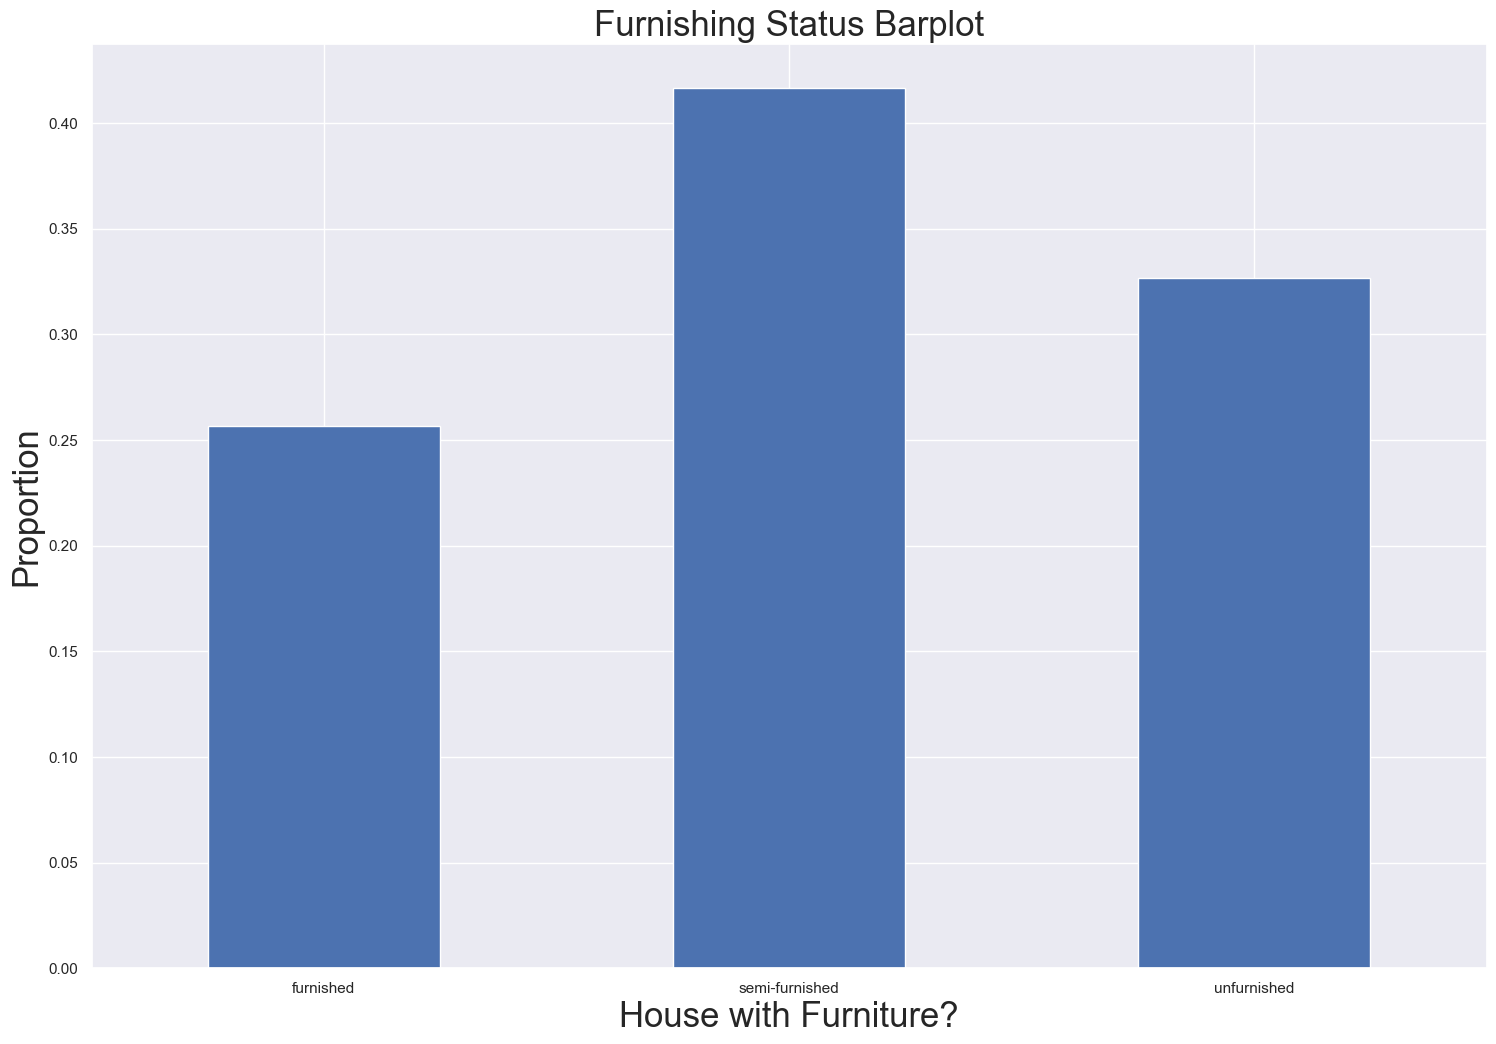

In [83]:
RelFreq_11 = houses['furnishingstatus'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_11.plot.bar(rot=0)
plt.title('Furnishing Status Barplot' , fontdict={'fontsize': 25})
plt.xlabel("House with Furniture?", fontdict={'fontsize': 25})
plt.ylabel("Proportion", fontdict={'fontsize': 25})
plt.show()

As we can see, the main option are the semi-furnished houses. Behind that, 
there is a slightly higher percentage of unfurnished  house, followed by the furnished ones

#### Relationship between `price` and `furnishing status`

In this case, the conclussions we reach from the study are more likely to be significant as the number of observations in each category of the variable are pretty balanced, however we need to order the categories to make the following plots more informative.



In [84]:
ordered_categories = ['unfurnished','semi-furnished', 'furnished']

We repeat the study we carried out previously by showing a violinplot and an stripplot.

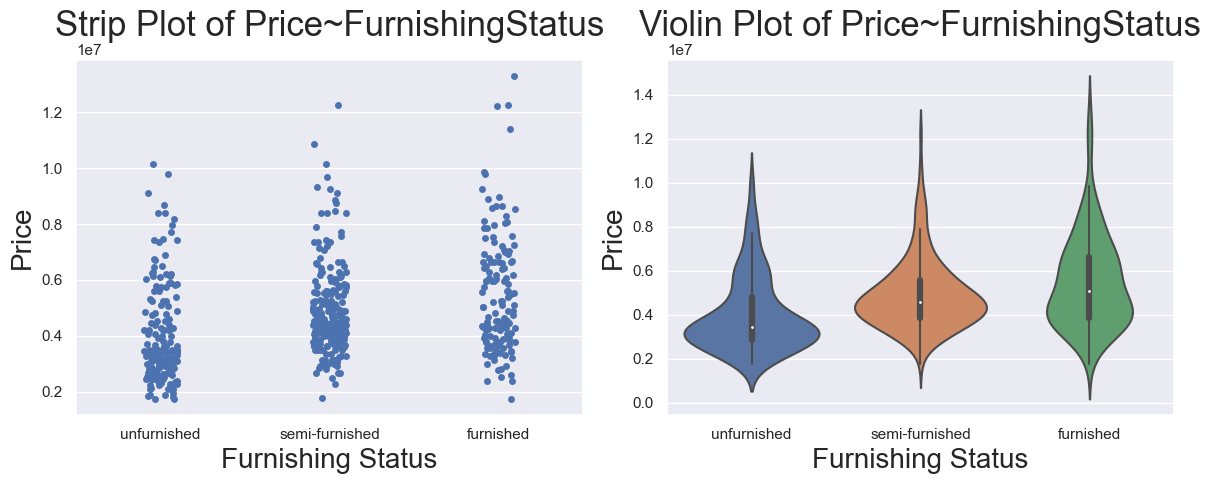

In [85]:
# Creation of 2 columns and 1 row subplot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# Subplot 1: Strip Plot
sns.stripplot(x=houses["furnishingstatus"], y=houses['price'],order=ordered_categories)
plt.xlabel('Furnishing Status', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Strip Plot of Price~FurnishingStatus', fontdict={'fontsize': 25})

# Subplot 2: Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x='furnishingstatus', y='price', data=houses,order=ordered_categories)
plt.xlabel('Furnishing Status', fontdict={'fontsize': 20})
plt.ylabel('Price', fontdict={'fontsize': 20})
plt.title('Violin Plot of Price~FurnishingStatus', fontdict={'fontsize': 25})

plt.tight_layout()

# Plot display
plt.show()

The growth in price from unfurnished houses to semi-furnished houses is evident. We can see how mean,median,min,max grow from one to the other.
Despite the growth from semi-furnished to totally furnished seems similar, the violinplot makes us doubt as it seems to show that the mode in the 2nd category is higher than in the 3rd one.

However, logic makes us think that it does not make sense that semi-furnished houses are more expensive than the completely furnished ones, and as this difference seems to be pretty mild, we do not give it much importance.

Even though, we will confirm it by calculating the principal measures(mean,median,...) for each category.

In [86]:
houses.groupby('furnishingstatus')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
furnishingstatus,,,,,,,,
furnished,140.0,5.495696e+06,2.117857e+06,1750000.0,3876250.0,5075000.0,6650000.0,13300000.0
semi-furnished,227.0,4.907524e+06,1.596688e+06,1767150.0,3850000.0,4585000.0,5582500.0,12250000.0
unfurnished,178.0,4.013831e+06,1.720247e+06,1750000.0,2870000.0,3430000.0,4821250.0,10150000.0


Table shows how max,mean, median and the quartiles grow as could be expected, however it stands out how the minimum price is almost equal for every category.

We can conclude from this that furnishing status is a significant variable, but it is not a main variable to explain price, as a very well furnished, yet small or simply bad house, will still be really cheap.  

### Relation Between Independent Variables

 Now, we can proceed to visually explore and analyze the relationships between the independent variables in our dataset 

In [87]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    category
 3   bathrooms         545 non-null    category
 4   stories           545 non-null    category
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    category
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
 13  price_binned      545 non-null    category
dtypes: category(12), int64(2)
memory usage: 16.8 KB


We have identified a total of 11 categorical independent variables within our dataset. To visualize these variables effectively, we will arrange them into a 4x4 grid for the majority and a 3x3 grid for the final variable, ensuring a comprehensive exploration of their distributions and relationships.

When a variable is paired with itself, instead of creating a bar plot, we present density curves for 'price' conditioned by the categorical variable. This approach provides a more insightful view of the distribution of prices within different categories. 

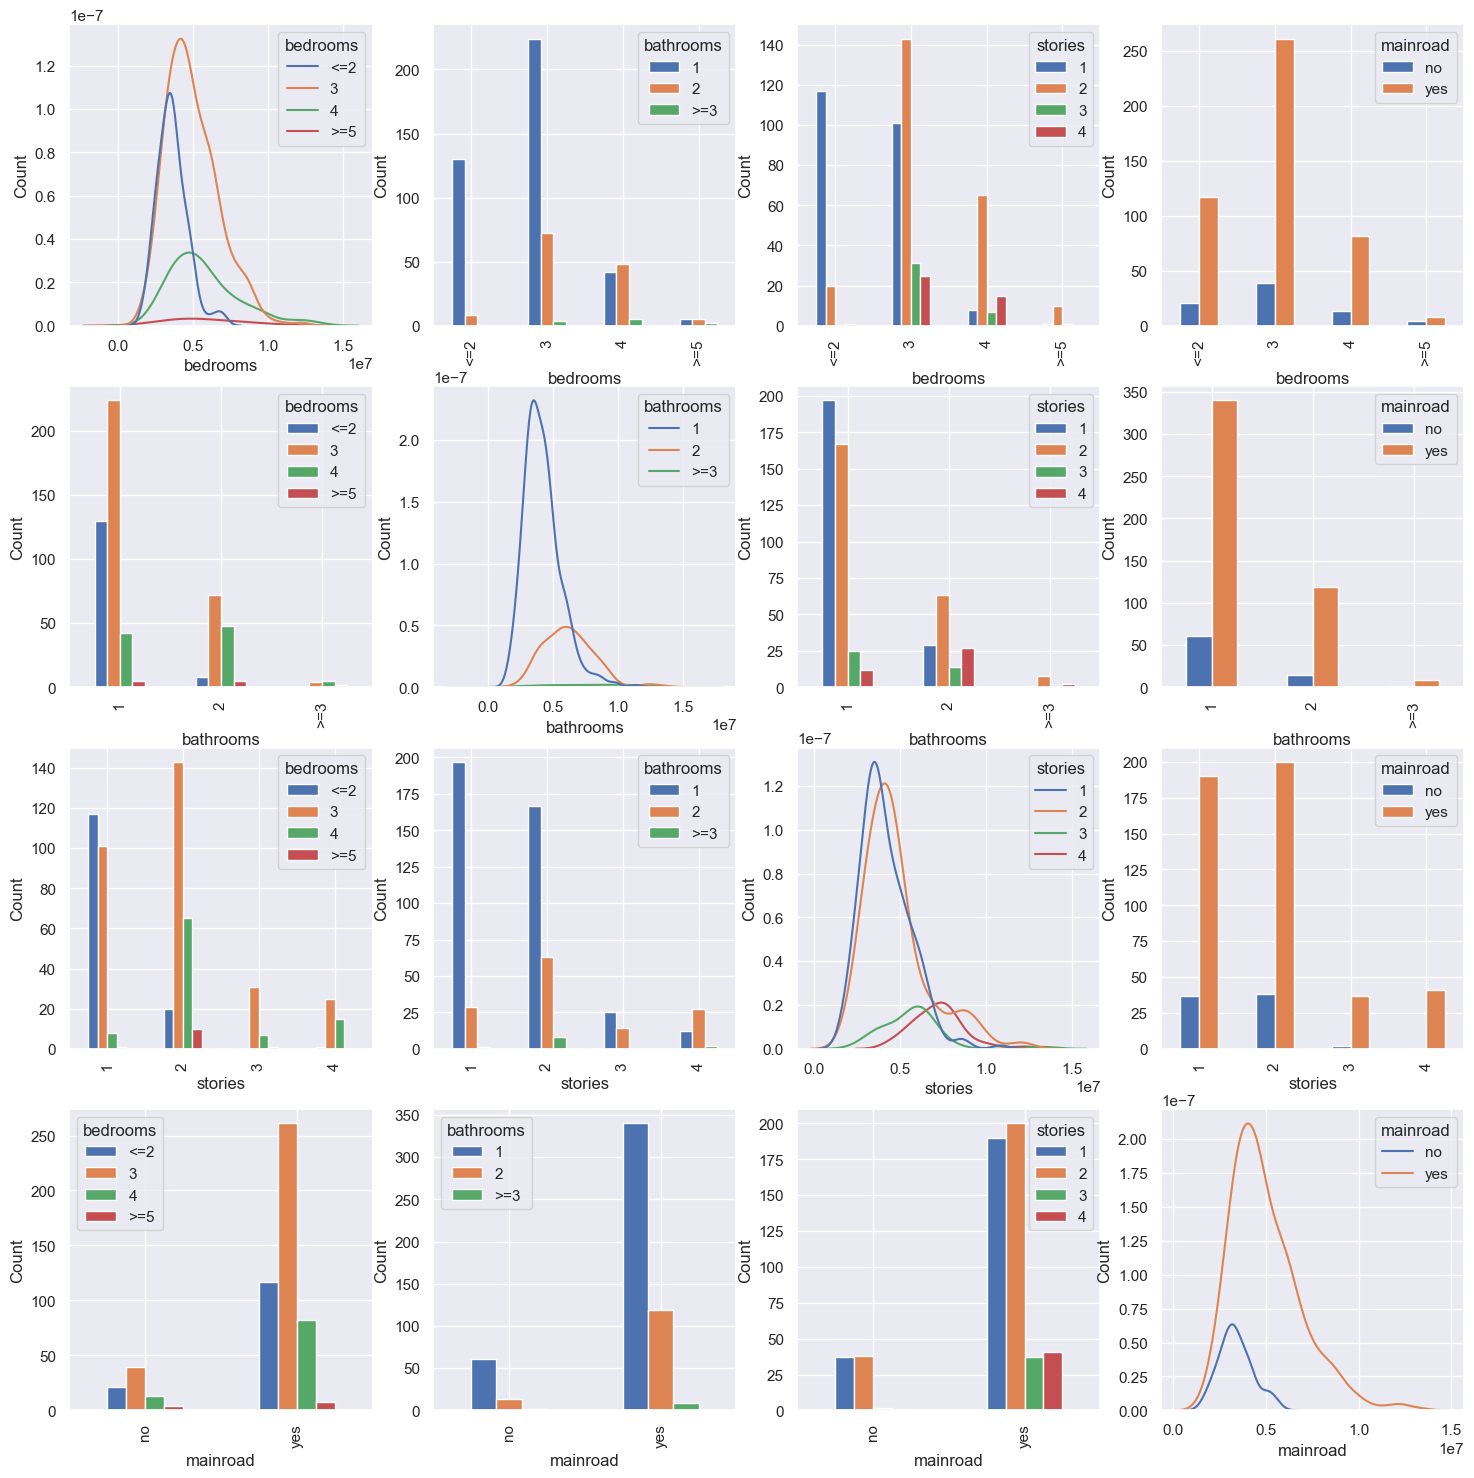

In [88]:
# Select independent variables
indep = houses[['bedrooms', 'bathrooms', 'stories', 'mainroad']]

# Create a subplot matrix for density plots and contingency tables
fig, axes = plt.subplots(4, 4, figsize=(18, 18))

# Iterate through the independent variables and create density plots and contingency tables
for i, col1 in enumerate(indep.columns):
    for j, col2 in enumerate(indep.columns):
        if i == j:
            # Create a density plot for equal variables on the diagonal
            sns.kdeplot(data=houses, x='price', hue=houses[col1], ax=axes[i, j])
        
        else:
            # Create a contingency table and plot for different variables
            cross_tab = pd.crosstab(index=houses[col1], columns=houses[col2])
            cross_tab.plot(kind='bar', ax=axes[i, j])
        
        axes[i, j].set_xlabel(col1)
        axes[i, j].set_ylabel('Count')

plt.show()

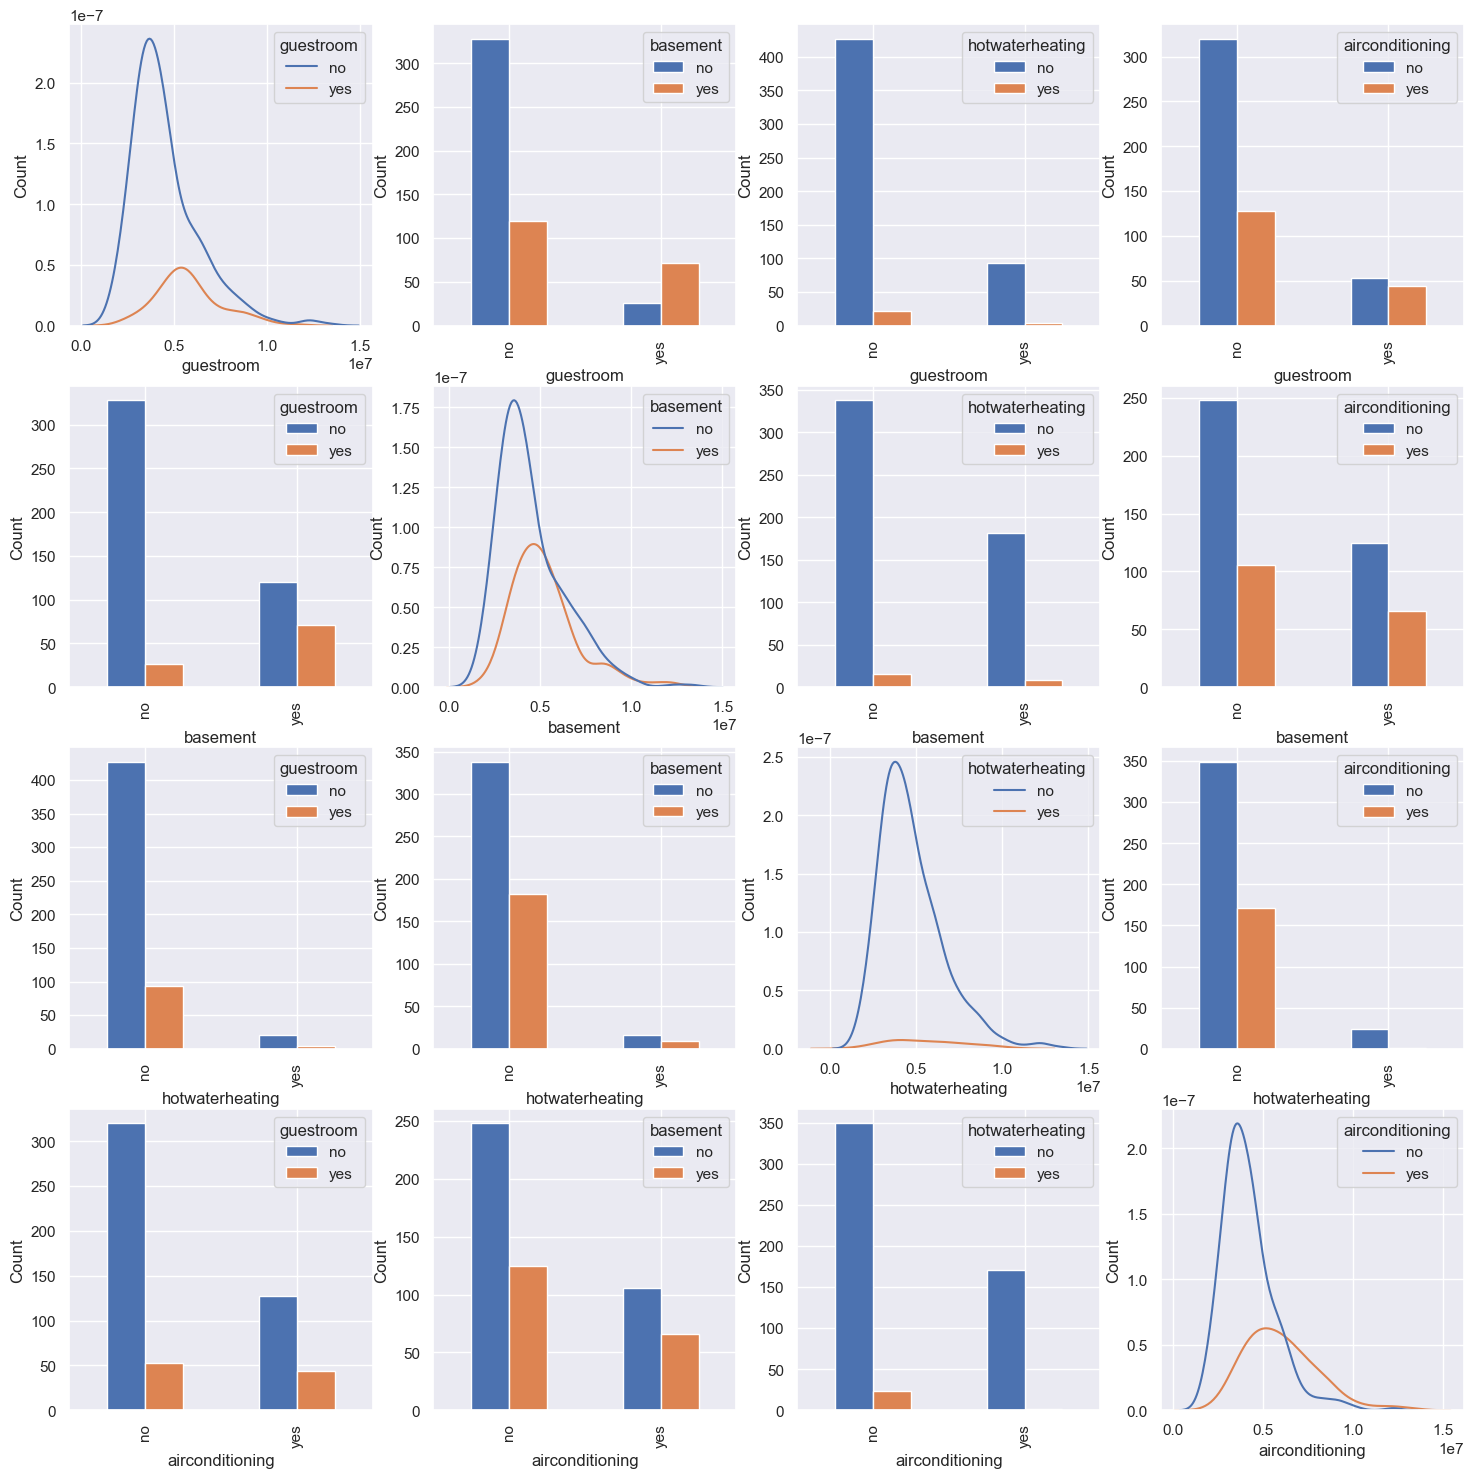

In [89]:
# Select independent variables
indep = houses[['guestroom', 'basement', 'hotwaterheating', 'airconditioning']]

# Create a subplot matrix for density plots and contingency tables
fig, axes = plt.subplots(4, 4, figsize=(18, 18))

# Iterate through the independent variables and create density plots and contingency tables
for i, col1 in enumerate(indep.columns):
    for j, col2 in enumerate(indep.columns):
        if i == j:
            # Create a density plot for equal variables on the diagonal
            sns.kdeplot(data=houses, x='price', hue=houses[col1], ax=axes[i, j])
        
        else:
            # Create a contingency table and plot for different variables
            cross_tab = pd.crosstab(index=houses[col1], columns=houses[col2])
            cross_tab.plot(kind='bar', ax=axes[i, j])
        
        axes[i, j].set_xlabel(col1)
        axes[i, j].set_ylabel('Count')

plt.show()

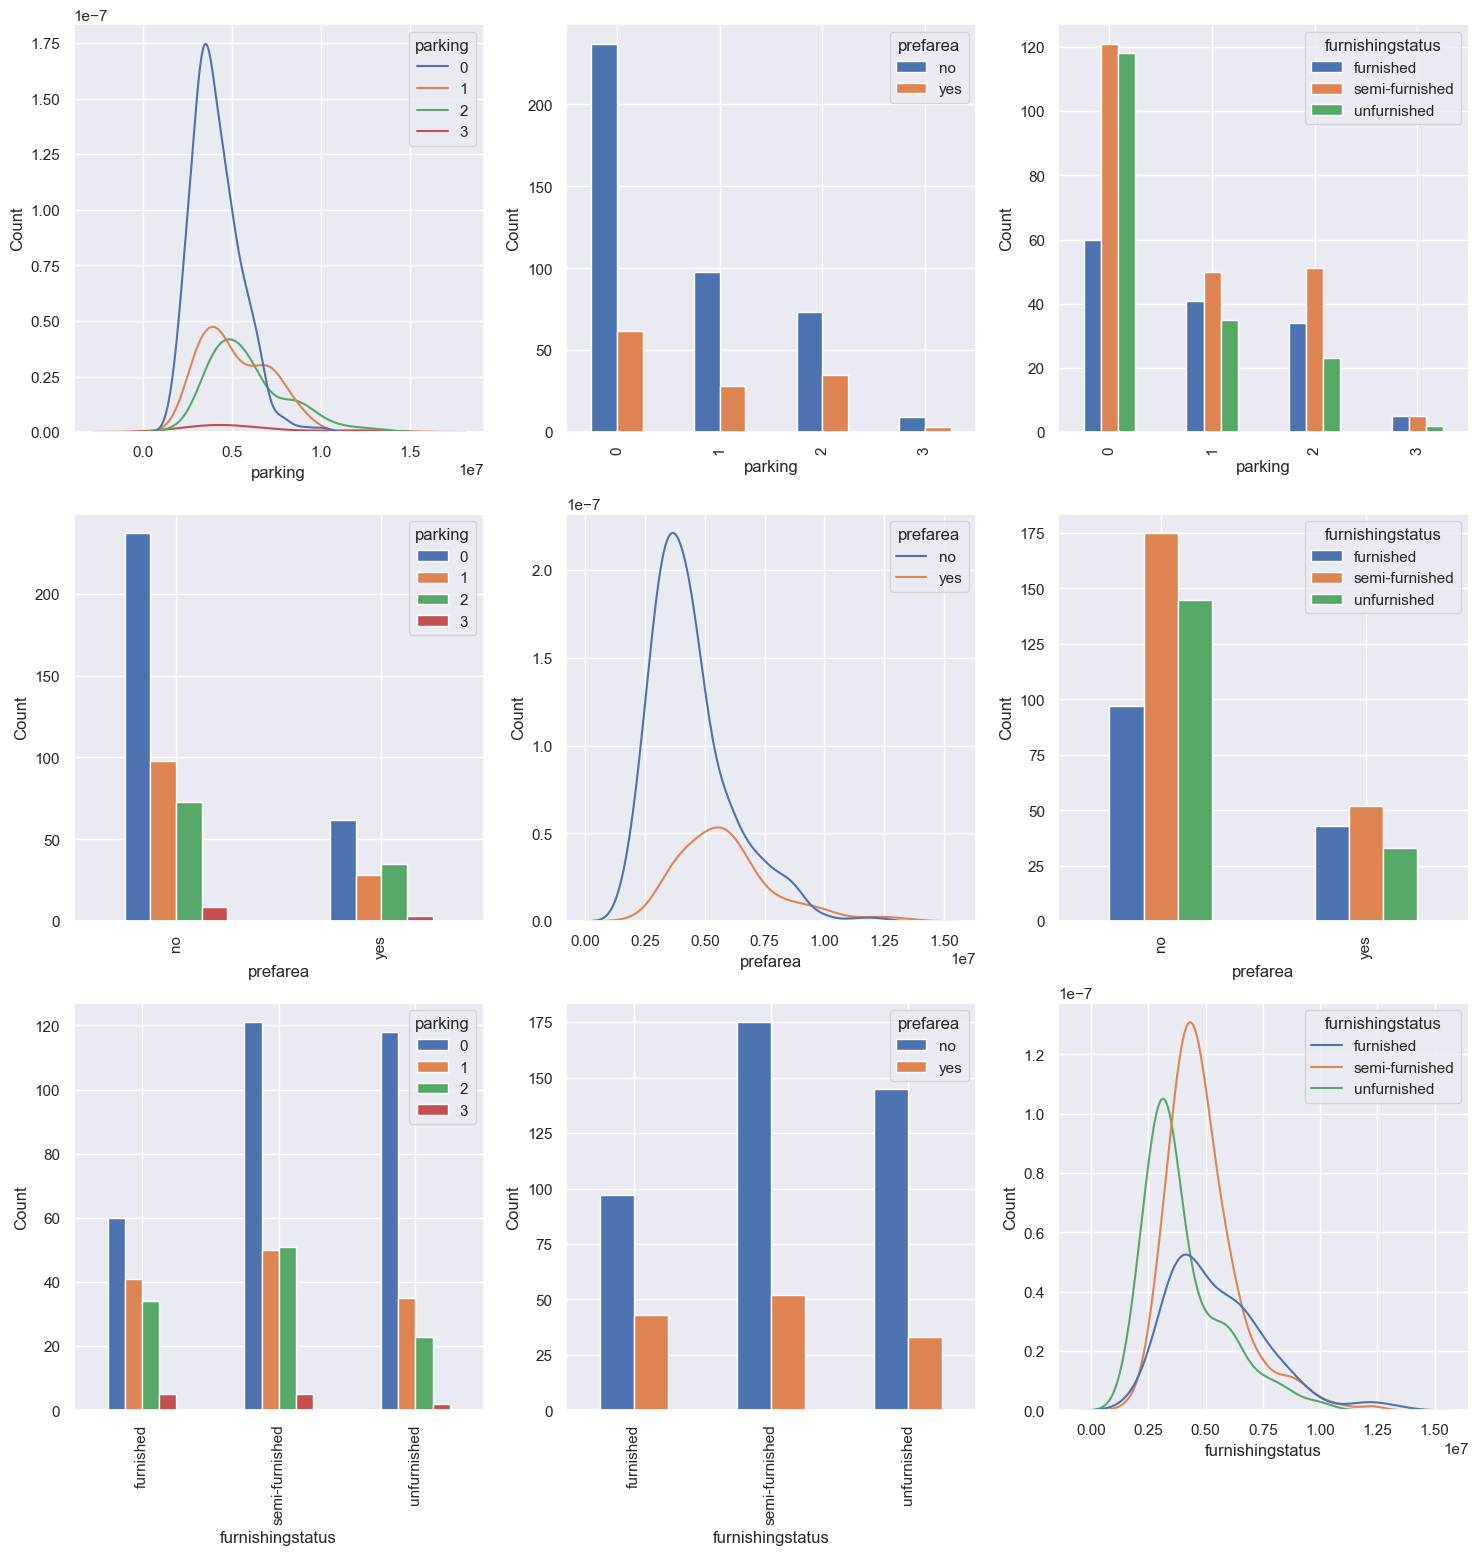

In [90]:
# Select independent variables
indep = houses[['parking', 'prefarea', 'furnishingstatus']]

# Create a subplot matrix for density plots and contingency tables
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Iterate through the independent variables and create density plots and contingency tables
for i, col1 in enumerate(indep.columns):
    for j, col2 in enumerate(indep.columns):
        if i == j:
            # Create a density plot for equal variables on the diagonal
            sns.kdeplot(data=houses, x='price', hue=houses[col1], ax=axes[i, j])
        
        else:
            # Create a contingency table and plot for different variables
            cross_tab = pd.crosstab(index=houses[col1], columns=houses[col2])
            cross_tab.plot(kind='bar', ax=axes[i, j])
        
        axes[i, j].set_xlabel(col1)
        axes[i, j].set_ylabel('Count')

plt.show()

An analysis of the data reveals varying degrees of correlation between different variables. Some variables exhibit clear associations, while others appear to be unrelated. Notably, furnishing status and prefarea do not demonstrate any significant relationship, suggesting that the preference for a particular area does not depend on the furnishing status of a property.

Moreover, there is no apparent connection between air conditioning and guestroom. This implies that the presence or absence of air conditioning does not influence the likelihood of a property having a guestroom. Similarly, the data does not indicate any significant correlation between hot water heating and the presence of a basement in the properties.

However, a notable and robust relationship emerges when examining the variables basement and guestroom. When the variable guestroom is set to 1, the data shows a higher percentage of houses that also have a basement, compared to those without one. This strong positive correlation suggests that the presence of a guestroom in a property is more likely when the property includes a basement. This insight could have practical implications for real estate decision-making and property valuation, as it highlights an interesting association between these two features.

### Models

The goal of this section is to compare several models taking into account their AIC measure and the well-known R2 coefficient. AIC measure is used to assesses models by finding a balance between the goodness of fit of the model and its simplicity (the number of parameters). 

The lower the AIC measure is, the better the model will be.

More info about AIC measure: https://en.wikipedia.org/wiki/Akaike_information_criterion.

 We will load again our dataset since we need to prepare our data to apply our linear regression model.

Our dependent variable Y will be `price`.

In [98]:
houses = pd.read_csv('Data/Housing.csv', sep=",", header=0)
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


We will encode our object columns in order to have only numerical values in our dataset. So, we will map numerical values to each class in our object columns (in fact, these are categorical columns, as we have seen).

In [99]:
columns_to_encode = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for column in columns_to_encode:
    houses[column] = houses[column].astype('category').cat.codes

In [100]:
houses.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


##### Building models

Now, we are in position to build our first model. Firstly, we include all the columns.

In [101]:
houses_fit1 = sm.OLS(houses.price, sm.add_constant(houses.drop(columns = 'price'))).fit()
houses_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     94.24
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          3.81e-123
Time:                        15:53:52   Log-Likelihood:                -8333.0
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     532   BIC:                         1.675e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.019e+05   2.62e+05      0.388      0.698   -4.14e+05    6.17e+05
area               243.9069     24.332     10.024      0.000     196.109     291.705
bedrooms          1.195e+05   7.27e+04      1.644      0.101   -2.33e+04    2.62e+05
bathrooms         9.889e+05   1.04e+05      9.551      0.000    7.85e+05    1.19e+06
stories           4.504e+05   6.43e+04      7.006      0.000    3.24e+05    5.77e+05
mainroad          4.231e+05   1.42e+05      2.970      0.003    1.43e+05    7.03e+05
guestroom          2.98e+05   1.32e+05      2.259      0.024    3.89e+04    5.57e+05
basement          3.579e+05    1.1e+05      3.243      0.001    1.41e+05    5.75e+05
hotwaterheating   8.729e+05   2.23e+05      3.909      0.000    4.34e+05    1.31e+06
airconditioning   8.536e+05   1.08e+05      7.879      0.000    6.41e+05    1.07e+06
parking           2.798e+05   5.86e+04      4.774      0.000    1.65e+05    3.95e+05
prefarea          6.471e+05   1.16e+05      5.585      0.000    4.19e+05    8.75e+05
furnishingstatus -2.132e+05   6.31e+04     -3.381      0.001   -3.37e+05   -8.93e+04
==============================================================================
Omnibus:                       94.906   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.728
Skew:                           0.872   Prob(JB):                     1.61e-54
Kurtosis:                       5.805   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As a first attempt at a model, it is not bad at all. However, it seems intuitive to try to reduce the number of variables in order to retain a model that incorporates the most significant variables.

To do so, we will examine the p-values from the previous table.

We set our confidence level as 0.01 since we want to simplify our model. So, having this in mind, we can remove parameters related to the variables `bedrooms` and `guestroom` and the constant parameter $\beta_{0}$.

We will build our model now without these variables.

In [103]:
houses_fit2 = sm.OLS(houses.price, sm.add_constant(houses.drop(columns = ['price', 'bedrooms', 'guestroom']))).fit()
houses_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     111.1
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          1.47e-123
Time:                        15:54:26   Log-Likelihood:                -8336.9
No. Observations:                 545   AIC:                         1.670e+04
Df Residuals:                     534   BIC:                         1.674e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.084e+05    2.2e+05      1.402      0.161   -1.24e+05     7.4e+05
area               251.5730     24.298     10.354      0.000     203.842     299.304
bathrooms         1.036e+06   1.01e+05     10.219      0.000    8.37e+05    1.24e+06
stories           4.948e+05   6.04e+04      8.191      0.000    3.76e+05    6.13e+05
mainroad          4.045e+05   1.42e+05      2.847      0.005    1.25e+05    6.84e+05
basement          4.672e+05   1.03e+05      4.532      0.000    2.65e+05     6.7e+05
hotwaterheating   8.798e+05   2.24e+05      3.920      0.000    4.39e+05    1.32e+06
airconditioning   8.687e+05   1.09e+05      7.998      0.000    6.55e+05    1.08e+06
parking           2.801e+05   5.87e+04      4.772      0.000    1.65e+05    3.95e+05
prefarea          6.613e+05   1.16e+05      5.684      0.000    4.33e+05     8.9e+05
furnishingstatus -2.229e+05   6.33e+04     -3.522      0.000   -3.47e+05   -9.86e+04
==============================================================================
Omnibus:                       95.312   Durbin-Watson:                   1.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.085
Skew:                           0.884   Prob(JB):                     1.64e-53
Kurtosis:                       5.753   Cond. No.                     2.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In this model, we notice that it would be better to remove our intercept, since it is not significative. 

In [104]:
houses_fit3 = sm.OLS(houses.price, houses.drop(columns = ['price', 'bedrooms', 'guestroom'])).fit()
houses_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1179.
Date:                Sat, 28 Oct 2023   Prob (F-statistic):                        0.00
Time:                        15:55:58   Log-Likelihood:                         -8337.9
No. Observations:                 545   AIC:                                  1.670e+04
Df Residuals:                     535   BIC:                                  1.674e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
area               263.3115     22.831     11.533      0.000     218.461     308.162
bathrooms         1.089e+06   9.41e+04     11.571      0.000    9.04e+05    1.27e+06
stories           5.197e+05   5.78e+04      8.993      0.000    4.06e+05    6.33e+05
mainroad          4.886e+05   1.29e+05      3.789      0.000    2.35e+05    7.42e+05
basement          4.964e+05   1.01e+05      4.911      0.000    2.98e+05    6.95e+05
hotwaterheating   8.874e+05   2.25e+05      3.951      0.000    4.46e+05    1.33e+06
airconditioning   8.578e+05   1.08e+05      7.910      0.000    6.45e+05    1.07e+06
parking           2.763e+05   5.87e+04      4.708      0.000    1.61e+05    3.92e+05
prefarea          6.482e+05   1.16e+05      5.584      0.000     4.2e+05    8.76e+05
furnishingstatus -1.785e+05   5.49e+04     -3.254      0.001   -2.86e+05   -7.08e+04
==============================================================================
Omnibus:                       87.308   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.304
Skew:                           0.820   Prob(JB):                     3.94e-48
Kurtosis:                       5.632   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We obtain a model with all variables being significant, which is quite important. Nevertheless, we will attempt to further simplify our model to gain interpretability and assess if its performance is not significantly reduced. 

So, we will simplify our model considering as dependent variables: `area`, `bedrooms`, `mainroad` and `prefarea`. We select these variables because they are highly correlated with `price` as we have seen.

In [105]:
houses_fit4 = sm.OLS(houses.price, sm.add_constant(houses[['area', 'bedrooms', 'mainroad', 'prefarea']])).fit()
houses_fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     101.2
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           2.88e-64
Time:                        16:00:20   Log-Likelihood:                -8491.1
No. Observations:                 545   AIC:                         1.699e+04
Df Residuals:                     540   BIC:                         1.701e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.715e+04   3.03e+05     -0.320      0.749   -6.93e+05    4.99e+05
area         350.4212     30.164     11.617      0.000     291.168     409.674
bedrooms    7.404e+05   8.37e+04      8.848      0.000    5.76e+05    9.05e+05
mainroad    7.865e+05   1.85e+05      4.261      0.000    4.24e+05    1.15e+06
prefarea     8.02e+05   1.49e+05      5.373      0.000    5.09e+05     1.1e+06
==============================================================================
Omnibus:                       87.201   Durbin-Watson:                   0.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.419
Skew:                           0.937   Prob(JB):                     2.41e-35
Kurtosis:                       4.873   Cond. No.                     2.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Checking pvalues, we notice that we could delete our $\beta_0$, so we will build a model with these variables without adding an intercept.

In [110]:
houses_fit5 = sm.OLS(houses.price, houses[['area', 'bedrooms', 'mainroad', 'prefarea']]).fit()
houses_fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              1641.
Date:                Sat, 28 Oct 2023   Prob (F-statistic):                   7.68e-301
Time:                        16:03:13   Log-Likelihood:                         -8491.1
No. Observations:                 545   AIC:                                  1.699e+04
Df Residuals:                     541   BIC:                                  1.701e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
area         348.1725     29.310     11.879      0.000     290.596     405.749
bedrooms    7.197e+05   5.34e+04     13.474      0.000    6.15e+05    8.25e+05
mainroad    7.613e+05   1.67e+05      4.564      0.000    4.34e+05    1.09e+06
prefarea    8.066e+05   1.48e+05      5.433      0.000    5.15e+05     1.1e+06
==============================================================================
Omnibus:                       90.191   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.084
Skew:                           0.960   Prob(JB):                     5.23e-37
Kurtosis:                       4.916   Cond. No.                     1.58e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now we will consider the simplest approach just with `area` as dependent variable.

In [114]:
houses_fit6 = sm.OLS(houses.price, sm.add_constant(houses[['area']])).fit()
houses_fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     218.9
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           7.39e-42
Time:                        16:07:53   Log-Likelihood:                -8551.2
No. Observations:                 545   AIC:                         1.711e+04
Df Residuals:                     543   BIC:                         1.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.387e+06   1.74e+05     13.681      0.000    2.04e+06    2.73e+06
area         461.9749     31.226     14.795      0.000     400.637     523.313
==============================================================================
Omnibus:                       92.668   Durbin-Watson:                   0.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.673
Skew:                           0.954   Prob(JB):                     1.31e-40
Kurtosis:                       5.108   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Although the intercept is significant, we will attempt to remove it to assess if it enhances our model's performance.

In [115]:
houses_fit7 = sm.OLS(houses.price, houses[['area']]).fit()
houses_fit7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              3717.
Date:                Sat, 28 Oct 2023   Prob (F-statistic):                   2.64e-245
Time:                        16:09:53   Log-Likelihood:                         -8632.0
No. Observations:                 545   AIC:                                  1.727e+04
Df Residuals:                     544   BIC:                                  1.727e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
area         855.7099     14.036     60.967      0.000     828.139     883.281
==============================================================================
Omnibus:                       45.221   Durbin-Watson:                   1.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.437
Skew:                          -0.411   Prob(JB):                     3.15e-26
Kurtosis:                       5.120   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the following section, we will observe that we have indeed enhanced the performance.

##### Comparison of our models

We will compare AIC measures and R2 coefficentes for each model.

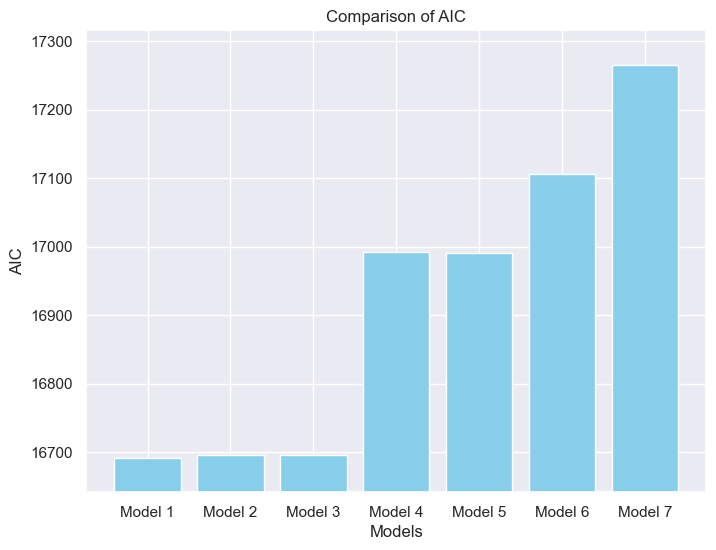

In [116]:
aic_values = [houses_fit1.aic, houses_fit2.aic, houses_fit3.aic, houses_fit4.aic, houses_fit5.aic, houses_fit6.aic, houses_fit7.aic]

model_labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7']

plt.figure(figsize=(8, 6))
plt.bar(model_labels, aic_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('AIC')
plt.title('Comparison of AIC')
plt.ylim(min(aic_values) - 50, max(aic_values) + 50)  

plt.show()

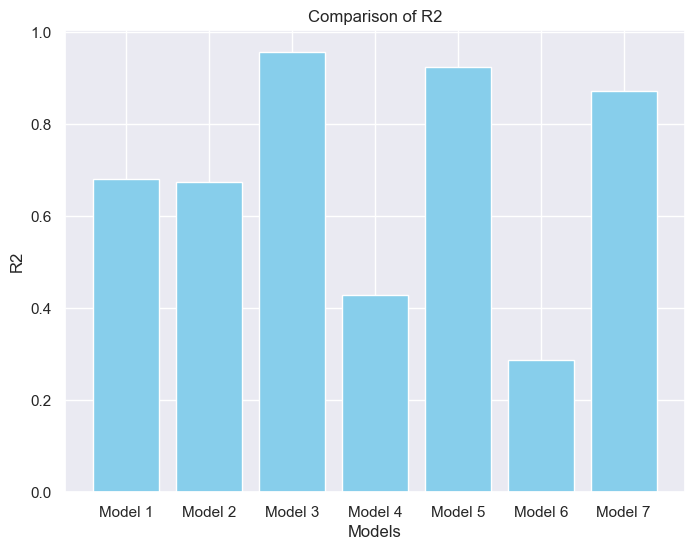

In [118]:
r2_values = [houses_fit1.rsquared, houses_fit2.rsquared, houses_fit3.rsquared, houses_fit4.rsquared, houses_fit5.rsquared, houses_fit6.rsquared, houses_fit7.rsquared]

model_labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7']

plt.figure(figsize=(8, 6))
plt.bar(model_labels, r2_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('R2')
plt.title('Comparison of R2')

plt.show()

Looking at both graphs, it seems clear that the best model is the third one. In our case, we will prioritize R-squared over AIC. Keeping this in mind, the second-best model would be the fifth one. 

However, we will select a simple linear regression model to visualize the results. Among the simple linear regression models we have, we will choose the second one, the one without an intercept, as it performs better.

In [122]:
model = sm.OLS(houses.price, houses[['area']]).fit()

So, now we can predict values. We will choose ten random values from `area` range and predict the `price` value for each one.

In [125]:
random.seed(2023)
area_values = [random.uniform(houses['area'].min(), houses['area'].max()) for _ in range(10)]
print(area_values)

[7221.514000808738, 15790.593387540883, 13927.543507615821, 6310.0832890210395, 9958.424460751225, 6556.772299597157, 3105.6940131955325, 3452.448851410288, 6064.0643626366245, 11788.283316698667]


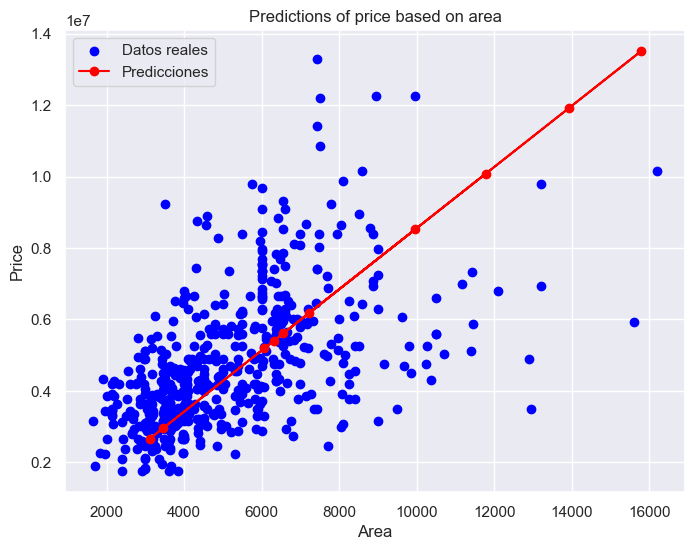

In [127]:
price_predict = model.predict(area_values) 

plt.figure(figsize=(8, 6))
plt.scatter(houses['area'], houses['price'], label='Datos reales', color='blue')
plt.plot(area_values, price_predict, label='Predicciones', color='red', marker='o', linestyle='-')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Predictions of price based on area')
plt.legend()
plt.show()

### Diagnosis of our model

If we are going to want to use a linear regression model reliably, we need to check that the residuals are independent, normal, with mean 0 and with a common viance $\sigma^2$.

We will use a Python script called `Linear_Reg_Diagnostic.py` with code [from the statsmodels web site]( https://www.statsmodels.org/dev/examples/notebooks/generated/linear_regression_diagnostics_plots.html)

In [133]:
%run ./Linear_Reg_Diagnostic.ipynb

In [134]:
model_diagnose = LinearRegDiagnostic(model)

##### The Residual vs Fitted plot

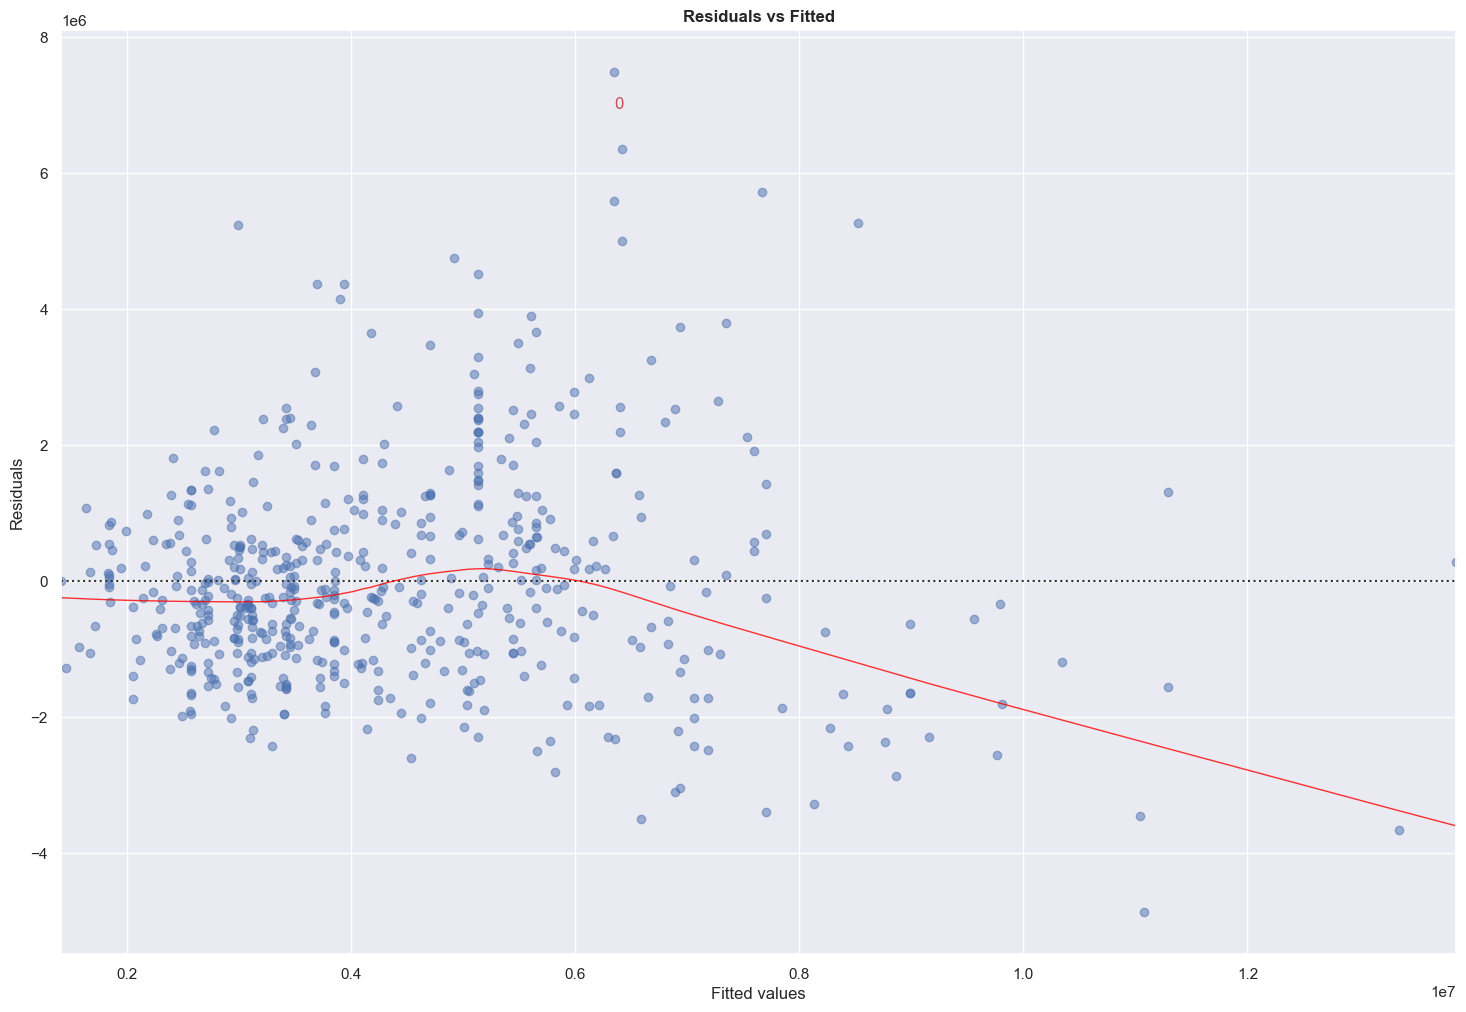

In [135]:
model_diagnose.residual_plot()
plt.show()

We see a slightly pattern for fitted values greater than 6. For values lower than 6, the residuals seem to follow an homogeneus random vertical distribution across the horizontal axis. This pattern should not be important since it could be caused by the low amount of points in this site. Anyway, we will not assure residuals independence.

##### The Residual QQ-plot

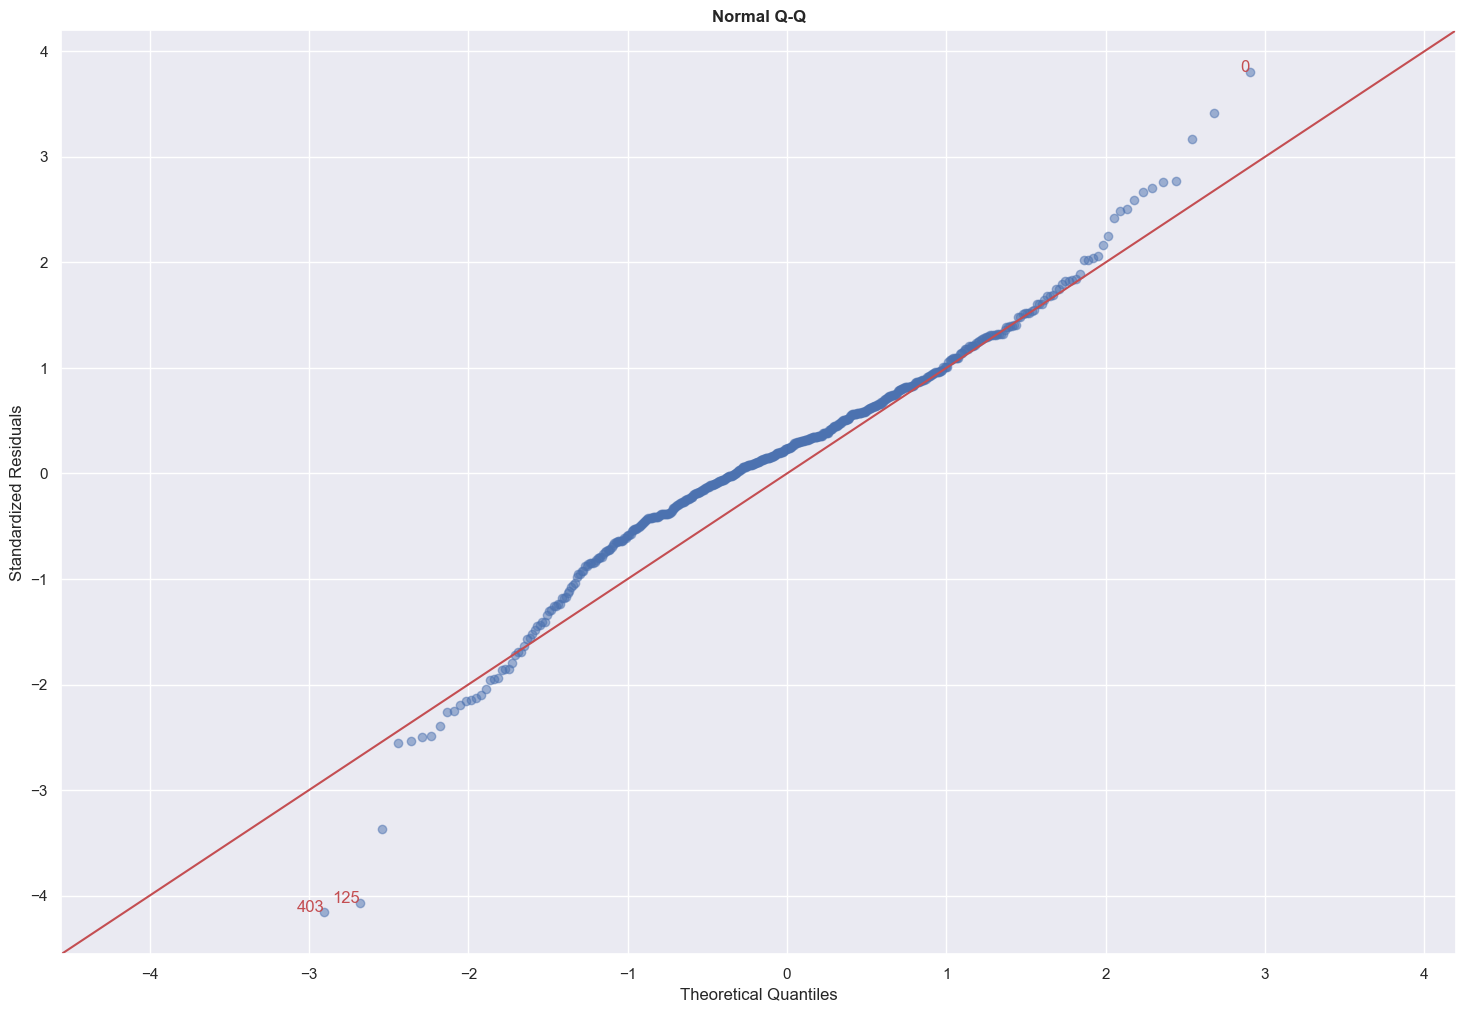

In [136]:
model_diagnose.qq_plot()
plt.show()

The plot does not look normal since standarized residuals does not fit with theorical quantiles, so our model does not verify the normality assumption.

##### The Scale-Location Plot

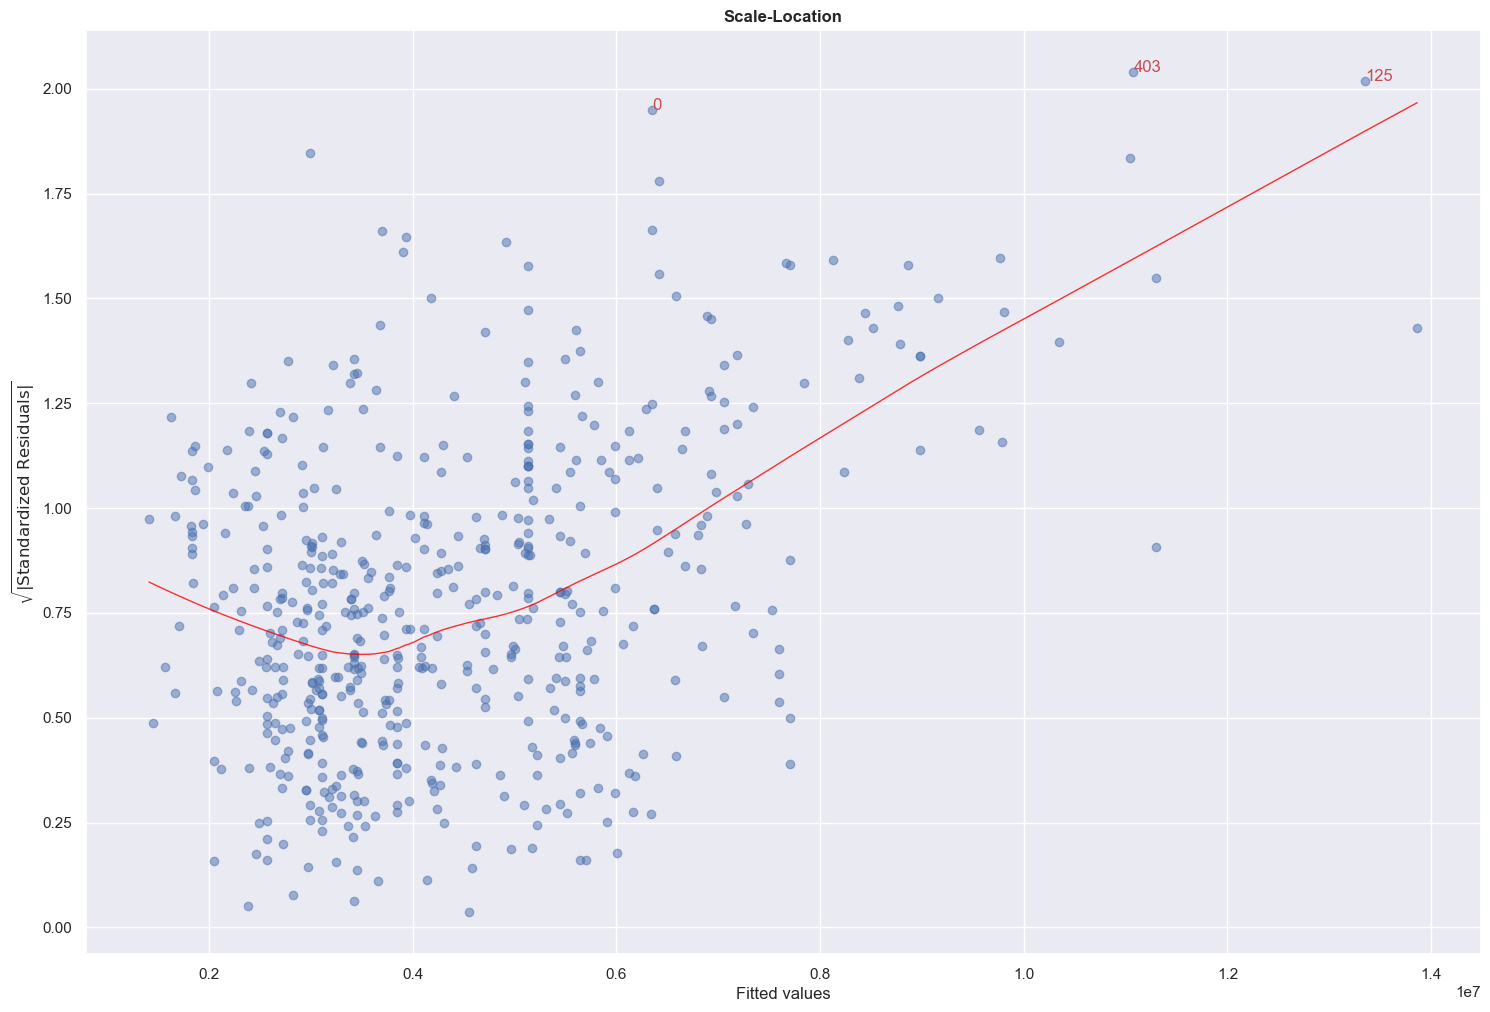

In [137]:
model_diagnose.scale_location_plot()
plt.show()

This plot is used to reinforce especially the assumption of homogeneous variance of our residuals, but also the independence. We see how the red line deviates from the ideal pattern, so we still having doubts about the independence and homogeneus variance of our residuals.

As we cannot assure that our assumptions are verified, we assert that our model is not reliable. In addition, we saw that our R2 is very low for this model.

Anyway, we just wanted to show graphically our results and to see how can wee do the diagnosis of our simple linear regression model.